Autor: Edurne Lopez Herrero

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.metrics.cluster import rand_score

from texttable import Texttable

In [2]:
#Draw bar diagrams for a data set column
def plot_diagrams(col,data):
    sb.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 70)
    plt.title(col)
    plt.show()
    print(data[f"{col}"].value_counts())

In [3]:
#Fill the na values in the column specified
def fillna_column(df, column):
    df[column] = df[column].fillna(df[column].value_counts().index[0])
    return df

In [4]:
#Plot the result clusters of each model based on two variables "var1" and "var2"
def plot_clusters(df, pred, var1, var2):
    fig, ax = plt.subplots()
    scatter = ax.scatter(df.values[:, var1], df.values[:, var2], c=pred)
    legend = ax.legend(*scatter.legend_elements())
    ax.add_artist(legend)
    plt.xlabel(df.columns[var1])
    plt.ylabel(df.columns[var2])
    plt.show()

# Data exploration



In [5]:
#Read data set
dataset = pd.read_csv('diabetic_data.csv')

#Replace ? values with null values
dataset = dataset.replace("?",np.nan)

dataset.shape

(101766, 50)

In [6]:
df = dataset.copy()

In [7]:
#Admission type id
df.admission_type_id = df.admission_type_id.replace({1.0:"Emergency",
                                                    2.0:"Urgent",
                                                    3.0:"Elective",
                                                    4.0:"New Born",
                                                    5.0:"Not Available",
                                                    6.0:"NULL",
                                                    7.0:"Trauma Center",
                                                    8.0:"Not Mapped"})

In [8]:
#Discharge disposition id
discharge_disposition_id={1 : 'Discharged to home', 2 : 'Discharged/transferred to another short term hospital', 3 : 'Discharged/transferred to SNF',4 : 'Discharged/transferred to ICF',
                          5 : 'Discharged/transferred to another type of inpatient care institution', 6 : 'Discharged/transferred to home with home health service', 7 : 'Left AMA', 8 : 'Discharged/transferred to home under care of Home IV provider',
                          9 : 'Admitted as an inpatient to this hospital', 10 : 'Neonate discharged to another hospital for neonatal aftercare', 11 : 'Expired', 12 : 'Still patient or expected to return for outpatient services',13 : 'Hospice / home',
                          14 : 'Hospice / medical facility', 15 : 'Discharged/transferred within this institution to Medicare approved swing bed', 16 : 'Discharged/transferred/referred another institution for outpatient services', 17 : 'Discharged/transferred/referred to this institution for outpatient services',18 : 'NULL',
                          19 : 'Expired at home. Medicaid only, hospice.', 20 : 'Expired in a medical facility. Medicaid only, hospice.', 21 : 'Expired, place unknown. Medicaid only, hospice.', 22 : 'Discharged/transferred to another rehab fac including rehab units of a hospital.', 23 : 'Discharged/transferred to a long term care hospital.', 24 : 'Discharged/transferred to a nursing facility certified under Medicaid but not',
                          25 : 'Not Mapped', 26 : 'Unknown/Invalid', 27 : 'Discharged/transferred to a federal health care facility.', 28 : 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct', 29 : 'Discharged/transferred to a Critical Access Hospital (CAH).', 30 : 'Discharged/transferred to another Type of Health Care Institution not Defined'}

df.discharge_disposition_id = df.discharge_disposition_id.replace(discharge_disposition_id)

In [9]:
#Admission source id
admission_source_id = {1: "Physician Referral", 2: "Clinic Referral", 3: "HMO Referral", 4: "Transfer from a hospital", 5: "Transfer from a Skilled Nursing Facility (SNF)", 6: "Transfer from another health care facility", 
                       7: "Emergency Room", 8: "Court/Law Enforcement", 9: "Not Available", 10: "Transfer from critial access hospital", 11: "Normal Delivery", 12: "Premature Delivery",
                       13: "Sick Baby", 14: "Extramural Birth", 15: "Not Available", 17: "NULL",18: "Transfer From Another Home Health Agency", 19: "Readmission to Same Home Health Agency", 
                       20: "Not Mapped", 21: "Unknown/Invalid", 22: "Transfer from hospital inpt/same fac reslt in a sep claim", 23: "Born inside this hospital", 24: "Born outside this hospital", 
                       25: "Transfer from Ambulatory Surgery Center", 26: "Transfer from Hospice"}

df.admission_source_id = df.admission_source_id.replace(admission_source_id)


In [10]:
df.describe()

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
for label in df.columns:
    if not pd.api.types.is_numeric_dtype(df[label]):
        print(df[label].value_counts())
        print('*******************************')

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
*******************************
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
*******************************
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
*******************************
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64
*******************************
Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64
*****

# Pre-processing

In [12]:
df1 = df.copy()
df2 = df.copy()

## Version 1 of data set

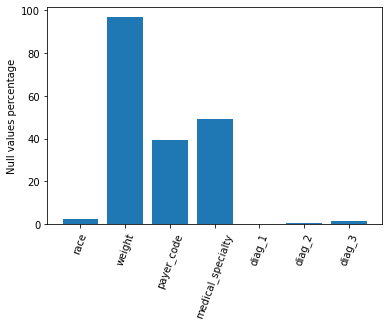

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64


In [13]:
#Obtain columns with null values
columns_na = df1.columns[df1.isna().any()]
per = []
for col in columns_na:
    per.append((df1[col].isna().sum() / len(df1))*100)
    
#Draw the percentages of null values
plt.bar(columns_na, per)
plt.xticks(rotation=70)
plt.ylabel('Null values percentage')
plt.show()

#Percentages of null values
na_ratio = ((df1.isna().sum() / len(df1))*100).sort_values(ascending = False)
print(na_ratio[na_ratio>0])

In [14]:
df1 = df1.drop(['weight', 'medical_specialty', 'payer_code'], axis=1)

In [15]:
#Fill in the na values with the most common value
columns_na = df1.columns[df1.isna().any()]
for column in columns_na:
    df1 = fillna_column(df1,column)

In [16]:
#Check for columns with null values
na_ratio = ((df1.isna().sum() / len(df1))*100).sort_values(ascending = False)
print(na_ratio[na_ratio>0])

Series([], dtype: float64)


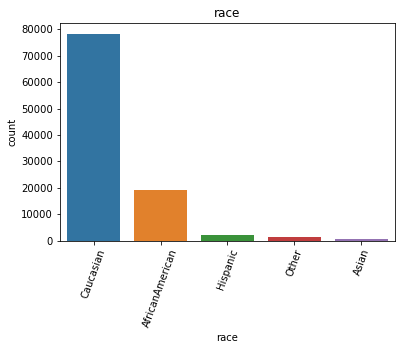

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [17]:
#Final distribution of race variable
plot_diagrams("race", df1)

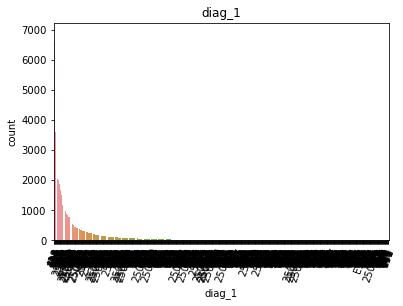

428    6883
414    6581
786    4016
410    3614
486    3508
       ... 
817       1
61        1
148       1
870       1
V51       1
Name: diag_1, Length: 716, dtype: int64


In [18]:
#Final distribution of diag_1 variable
plot_diagrams("diag_1", df1)

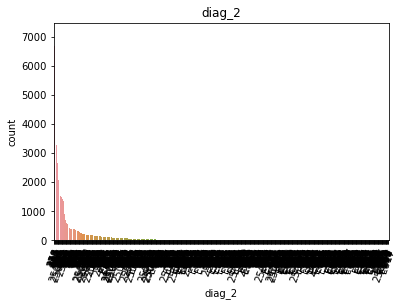

276     7110
428     6662
250     6071
427     5036
401     3736
        ... 
232        1
908        1
52         1
E817       1
927        1
Name: diag_2, Length: 748, dtype: int64


In [19]:
#Final distribution of diag_2 variable
plot_diagrams("diag_2", df1)

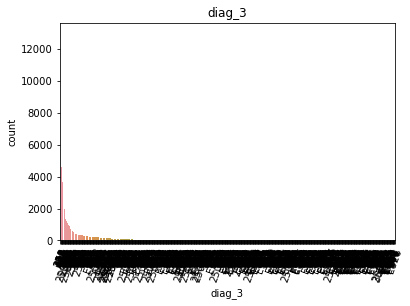

250     12978
401      8289
276      5175
428      4577
427      3955
        ...  
657         1
684         1
603         1
E826        1
971         1
Name: diag_3, Length: 789, dtype: int64


In [20]:
#Final distribution of diag_3 variable
plot_diagrams("diag_3", df1)

In [21]:
#Remove encounter and patient identifiers
df1 = df1.drop(['patient_nbr','encounter_id'], axis=1)

In [22]:
#One hot encoding
df1_data = pd.get_dummies(df1)

df1_data.shape

(101766, 2416)

In [23]:
#Normalise numerical variables
numeric = df1_data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
sc = StandardScaler()
numericSC = pd.DataFrame(sc.fit_transform(numeric),columns=numeric.columns)

#Join the normalised numerical variables with the categorical variables once One-Hot Encoding has been applied
categorical = df1_data[df1_data.drop(numeric.columns,axis=1).columns]
df1_dataScaled = pd.concat([numericSC, categorical], axis=1, join='inner')

In [24]:
#Save 50% of data for later use in the BIRCH
df1_sample = df1_dataScaled.sample(frac=0.5, replace=False, random_state=1234)
df1_sample.shape

(50883, 2416)

## Version 2 of data set

In [25]:
#Eliminate variables with 35% or more null values.
df2 = df2.drop(['weight', 'medical_specialty', 'payer_code'], axis=1)

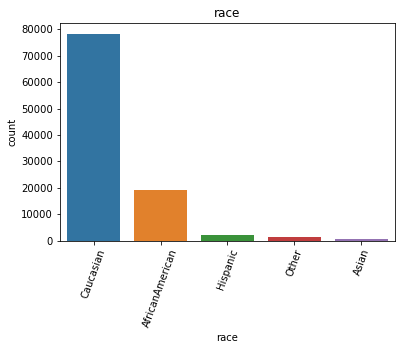

Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [26]:
#Fill the race variable with the most common category
df2 = fillna_column(df2,'race')
plot_diagrams("race", df2)

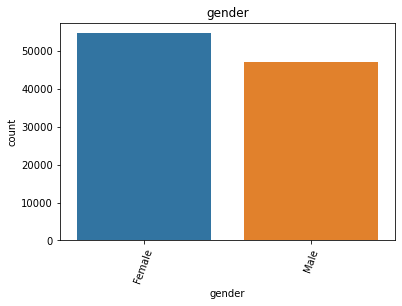

Female    54708
Male      47055
Name: gender, dtype: int64


In [27]:
#Remove the instances with Unknown/Inavalid value
df2 = df2[df2['gender'] != 'Unknown/Invalid']
plot_diagrams("gender", df2)

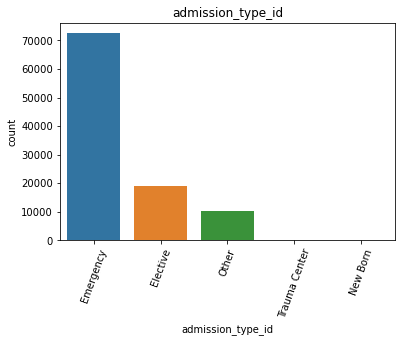

Emergency        72468
Elective         18868
Other            10396
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


In [28]:
#Group the categories of Admission type id variable
df2.admission_type_id = df2.admission_type_id.replace({'Urgent': 'Emergency',
                                                    'Not Available': 'Other',
                                                    'NULL': 'Other',
                                                    'Not Mapped': 'Other'})
plot_diagrams("admission_type_id", df2)

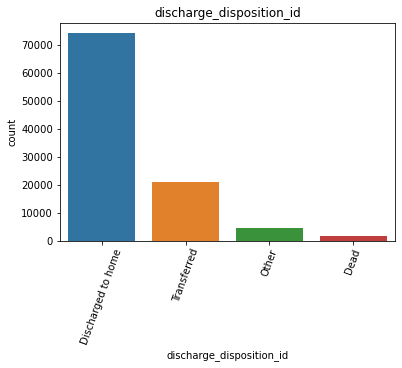

Discharged to home    74264
Transferred           21167
Other                  4680
Dead                   1652
Name: discharge_disposition_id, dtype: int64


In [29]:
#Group the categories of Discharge disposition id variable
discharge_disposition_id={'Discharged/transferred to another short term hospital': 'Transferred', 'Discharged/transferred to SNF': 'Transferred', 'Discharged/transferred to ICF': 'Transferred',
                          'Discharged/transferred to another type of inpatient care institution': 'Transferred', 'Discharged/transferred to home with home health service': 'Discharged to home', 'Left AMA': 'Discharged to home', 
                          'Discharged/transferred to home under care of Home IV provider': 'Discharged to home', 'Admitted as an inpatient to this hospital': 'Transferred', 'Neonate discharged to another hospital for neonatal aftercare': 'Transferred', 
                          'Expired': 'Dead', 'Still patient or expected to return for outpatient services': 'Transferred', 'Hospice / home': 'Discharged to home', 'Hospice / medical facility': 'Transferred', 
                          'Discharged/transferred within this institution to Medicare approved swing bed': 'Transferred', 'Discharged/transferred/referred another institution for outpatient services': 'Transferred', 
                          'Discharged/transferred/referred to this institution for outpatient services': 'Transferred', 'NULL': 'Other', 'Expired at home. Medicaid only, hospice.': 'Dead', 'Expired in a medical facility. Medicaid only, hospice.': 'Dead', 
                          'Expired, place unknown. Medicaid only, hospice.': 'Dead', 'Discharged/transferred to another rehab fac including rehab units of a hospital.': 'Transferred', 'Discharged/transferred to a long term care hospital.': 'Transferred', 
                          'Discharged/transferred to a nursing facility certified under Medicaid but not': 'Transferred', 'Not Mapped': 'Other', 'Unknown/Invalid': 'Other', 'Discharged/transferred to a federal health care facility.': 'Transferred', 
                          'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct': 'Transferred', 'Discharged/transferred to a Critical Access Hospital (CAH).': 'Transferred', 
                          'Discharged/transferred to another Type of Health Care Institution not Defined': 'Transferred'}

df2.discharge_disposition_id = df2.discharge_disposition_id.replace(discharge_disposition_id)
plot_diagrams("discharge_disposition_id", df2)

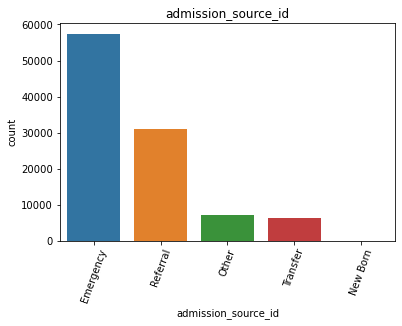

Emergency    57492
Referral     30855
Other         7083
Transfer      6328
New Born         5
Name: admission_source_id, dtype: int64


In [30]:
#Group the categories of Admission source id variable

admission_source_id = {'Physician Referral': 'Referral', 'Clinic Referral': 'Referral', 'HMO Referral': 'Referral', 'Transfer from a hospital': 'Transfer', 'Transfer from a Skilled Nursing Facility (SNF)': 'Transfer',
                       'Transfer from another health care facility': 'Transfer', 'Emergency Room': 'Emergency', 'Court/Law Enforcement': 'Other', 'Not Available': 'Other', 'Transfer from critial access hospital': 'Transfer',
                       'Normal Delivery': 'New Born', 'Premature Delivery': 'New Born', 'Sick Baby': 'New Born', 'Extramural Birth': 'New Born', 'Not Available': 'Other', 'NULL': 'Other',
                       'Transfer From Another Home Health Agency': 'Transfer', 'Readmission to Same Home Health Agency': 'Transfer', 'Not Mapped': 'Other', 'Unknown/Invalid': 'Other', 
                       'Transfer from hospital inpt/same fac reslt in a sep claim': 'Transfer','Born inside this hospital': 'New Born', 'Born outside this hospital': 'New Born', 'Transfer from Ambulatory Surgery Center': 'Transfer', 
                       'Transfer from Hospice': 'Transfer'}

df2.admission_source_id = df2.admission_source_id.replace(admission_source_id)
plot_diagrams("admission_source_id", df2)

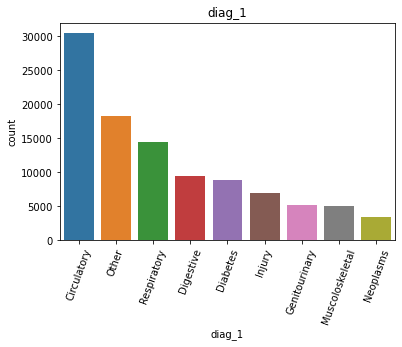

Circulatory        30436
Other              18193
Respiratory        14423
Digestive           9475
Diabetes            8757
Injury              6972
Genitourinary       5117
Muscoloskeletal     4957
Neoplasms           3433
Name: diag_1, dtype: int64


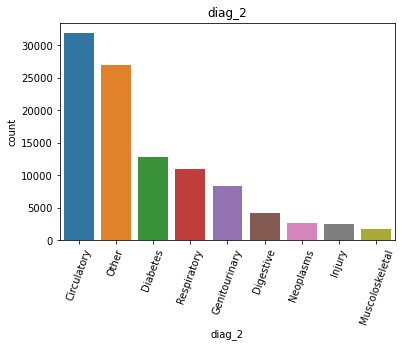

Circulatory        31880
Other              26911
Diabetes           12794
Respiratory        10895
Genitourinary       8376
Digestive           4170
Neoplasms           2547
Injury              2426
Muscoloskeletal     1764
Name: diag_2, dtype: int64


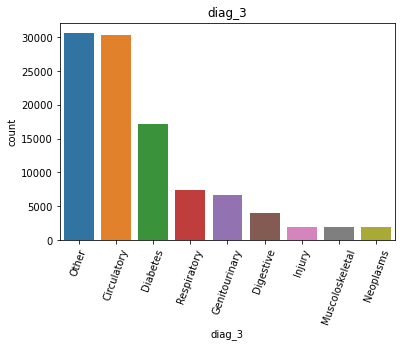

Other              30617
Circulatory        30305
Diabetes           17157
Respiratory         7358
Genitourinary       6680
Digestive           3930
Injury              1945
Muscoloskeletal     1915
Neoplasms           1856
Name: diag_3, dtype: int64


In [31]:
#Group the categories of Diag_1, Diag_2 and Diag_3 variables
diag_cols = ["diag_1","diag_2","diag_3"]

for col in diag_cols:
    df2["tmp_diag"] = -1
    df2.loc[(df2[col].str.contains("V")) | (df2[col].str.contains("E")), col] = -1
    df2[col] = df2[col].astype(np.float16)
    
    df2.loc[(df2[col]>=390) & (df2[col]<=459) | (df2[col]==785), "tmp_diag"] = "Circulatory"
    df2.loc[(df2[col]>=460) & (df2[col]<=519) | (df2[col]==786), "tmp_diag"] = "Respiratory"
    df2.loc[(df2[col]>=520) & (df2[col]<=579) | (df2[col]==787), "tmp_diag"] = "Digestive"
    df2.loc[(df2[col]>=250) & (df2[col]<251), "tmp_diag"] = "Diabetes"
    df2.loc[(df2[col]>=800) & (df2[col]<=999), "tmp_diag"] = "Injury"
    df2.loc[(df2[col]>=710) & (df2[col]<=739), "tmp_diag"] = "Muscoloskeletal"
    df2.loc[(df2[col]>=580) & (df2[col]<=629) | (df2[col] == 788), "tmp_diag"] = "Genitourinary"
    df2.loc[(df2[col]>=140) & (df2[col]<=239), "tmp_diag"] = "Neoplasms"

    df2["tmp_diag"] = df2["tmp_diag"].replace({-1: 'Other'})
    df2[col] = df2["tmp_diag"]
    df2 = df2.drop("tmp_diag", axis=1)

    
#Dibujar la distribucion final de diag_1, diag_2 y diag_3
for col in diag_cols:
    plot_diagrams(col, df2)

In [32]:
#Eliminate columns with 95% or more instances with the same value
df2 = df2.drop(['examide', 'citoglipton', 'acetohexamide', 'troglitazone', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1)

In [33]:
#Remove encounter and patient identifiers
df2 = df2.drop(['patient_nbr','encounter_id'], axis=1)

In [34]:
#One hot encoding
df2_data = pd.get_dummies(df2)

df2_data.shape

(101763, 140)

In [35]:
#Normalise numerical variables
numeric = df2_data[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
sc = StandardScaler()
numericSC = pd.DataFrame(sc.fit_transform(numeric),columns=numeric.columns)

#Join the normalised numerical variables with the categorical variables once One-Hot Encoding has been applied
categorical = df2_data[df2_data.drop(numeric.columns,axis=1).columns]
categorical = categorical.reset_index(drop=True)
df2_dataScaled = pd.concat([numericSC, categorical], axis=1, join='inner')

In [36]:
df2_dataScaled.shape

(101763, 140)

In [37]:
#Save 50% of data for later use in the BIRCH
df2_sample = df2_dataScaled.sample(frac=0.5, replace=False, random_state=1234)
df2_sample.shape

(50882, 140)

# Modeling

## Elbow Method

In [38]:
def plot_elbow_method(data):
    inertia = []
    K = range(1,20)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        inertia.append(kmeanModel.inertia_)

    print(inertia)
    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()

[49137699.960753106, 23790328.71793543, 15699848.966186862, 12970840.879005186, 11143942.359123154, 9696972.220513623, 8843029.909354432, 8134602.380620157, 7605588.106324482, 7168275.7982926555, 6790731.544694377, 6486886.385592737, 6187561.386690659, 5975749.410093463, 5784340.031237585, 5590520.808232753, 5433109.968942585, 5283629.2069808645, 5148743.016502286]


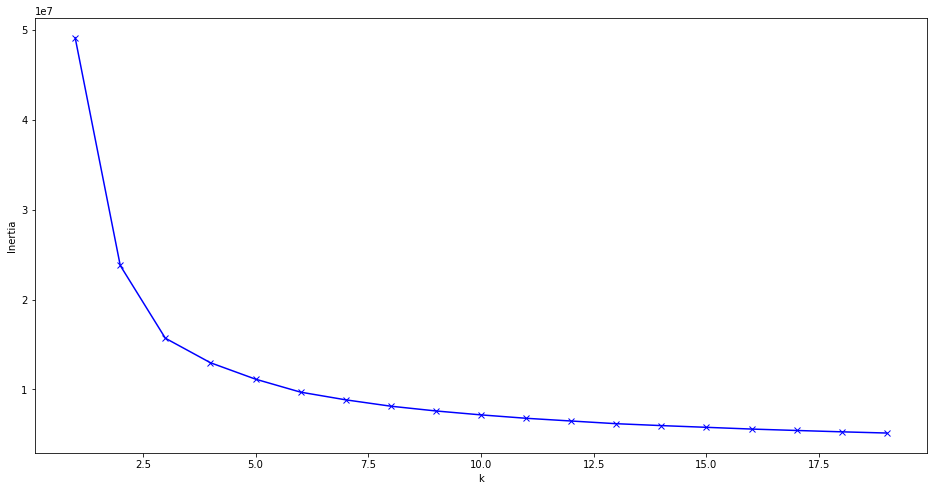

In [40]:
#Version 1
plot_elbow_method(df1_data)

[49042884.84647665, 23697440.03545628, 15607322.069403846, 12878546.577350302, 11051527.297264263, 9604568.08400954, 8750648.79573593, 8042286.664618697, 7513180.5456517115, 7075768.880608759, 6697894.632030407, 6394411.069085456, 6095814.727408107, 5885885.09022912, 5690300.076157727, 5498144.954880017, 5342430.246458351, 5190635.308968275, 5053928.696330913]


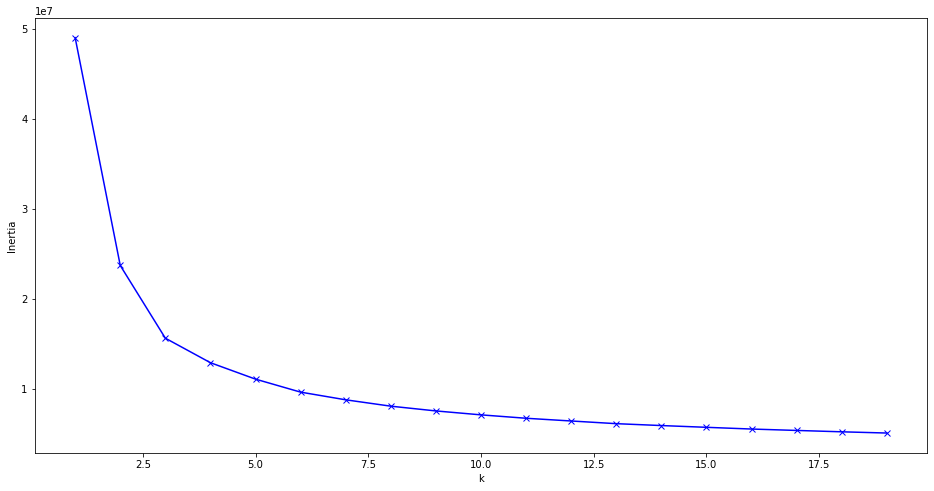

<Figure size 432x288 with 0 Axes>

In [64]:
#Version 2
plot_elbow_method(df2_data)

## K-Means

In [39]:
def get_best_kmeans_model(data,data_org, n_clusters, n_init_list, max_iter_list):
    
    t = Texttable()
    t.header(['K', 'n_init', 'max_iter', 'Silhouette Index', 'Calinski-Harabasz Index', 'Clusters distribution'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([5,8,8,20,25,40])
    
    for n_init in n_init_list:
        for max_iter in max_iter_list:
            print("n_init:",n_init,"max_iter:",max_iter)
            model = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, max_iter=max_iter, random_state=1234)
            pred = model.fit_predict(data)
            score_silhouette = silhouette_score(data_org, pred,metric='euclidean')
            score_calinski = calinski_harabasz_score(data_org, pred)
            print("score:",score_silhouette)
            unique, counts = np.unique(pred, return_counts=True)
            t.add_row([n_clusters, n_init, max_iter, score_silhouette,score_calinski, dict(zip(unique, counts))])
                
    
    print(t.draw())

### Version 1

#### K = 2

In [40]:
#2 hours
get_best_kmeans_model(df1_dataScaled, df1_data, 2, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.18681785319764338
n_init: 5 max_iter: 50
score: 0.1866795161137053
n_init: 5 max_iter: 100
score: 0.1866795161137053
n_init: 5 max_iter: 200
score: 0.1866795161137053
n_init: 10 max_iter: 10
score: 0.18681785319764338
n_init: 10 max_iter: 50
score: 0.1866745887717284
n_init: 10 max_iter: 100
score: 0.1866745887717284
n_init: 10 max_iter: 200
score: 0.1866745887717284
n_init: 15 max_iter: 10
score: 0.18681785319764338
n_init: 15 max_iter: 50
score: 0.1866745887717284
n_init: 15 max_iter: 100
score: 0.1866745887717284
n_init: 15 max_iter: 200
score: 0.1866745887717284
n_init: 20 max_iter: 10
score: 0.18681785319764338
n_init: 20 max_iter: 50
score: 0.18669376656122388
n_init: 20 max_iter: 100
score: 0.18669376656122388
n_init: 20 max_iter: 200
score: 0.18669376656122388
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |   Silhouette Index   |  Calinsk

In [43]:
model1k2 = KMeans(n_clusters=2, init='k-means++', n_init=20, max_iter=50, random_state=1234)
pred1k2 = model1k2.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k2.n_iter_)

{0: 63203, 1: 38563}
17


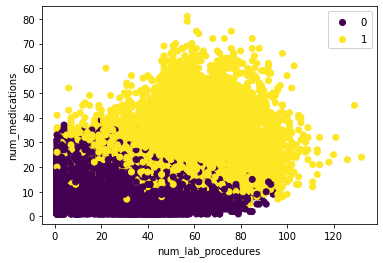

In [44]:
plot_clusters(df1, pred1k2, 7, 9)

#### K = 3

In [45]:
#2 hours
get_best_kmeans_model(df1_dataScaled, df1_data, 3, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.0652746800705179
n_init: 5 max_iter: 50
score: 0.06396182036505152
n_init: 5 max_iter: 100
score: 0.06396182036505152
n_init: 5 max_iter: 200
score: 0.06396182036505152
n_init: 10 max_iter: 10
score: 0.0652746800705179
n_init: 10 max_iter: 50
score: 0.06396182036505152
n_init: 10 max_iter: 100
score: 0.06396182036505152
n_init: 10 max_iter: 200
score: 0.06396182036505152
n_init: 15 max_iter: 10
score: 0.0652746800705179
n_init: 15 max_iter: 50
score: 0.06400355848207227
n_init: 15 max_iter: 100
score: 0.06400355848207227
n_init: 15 max_iter: 200
score: 0.06400355848207227
n_init: 20 max_iter: 10
score: 0.0652746800705179
n_init: 20 max_iter: 50
score: 0.06400355848207227
n_init: 20 max_iter: 100
score: 0.06400355848207227
n_init: 20 max_iter: 200
score: 0.06400355848207227
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |   Silhouette Index   |  Ca

In [46]:
model1k3 = KMeans(n_clusters=3, init='k-means++', n_init=5, max_iter=10, random_state=1234)
pred1k3 = model1k3.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k3.n_iter_)

{0: 9403, 1: 33212, 2: 59151}
10


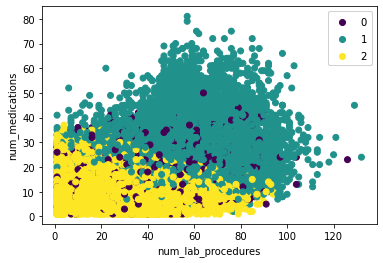

In [47]:
plot_clusters(df1, pred1k3, 7, 9)

#### K = 4

In [48]:
#2 hours
get_best_kmeans_model(df1_dataScaled, df1_data, 4, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.007647889704163385
n_init: 5 max_iter: 50
score: 0.004456880835911515
n_init: 5 max_iter: 100
score: 0.004456880835911515
n_init: 5 max_iter: 200
score: 0.004456880835911515
n_init: 10 max_iter: 10
score: 0.007647889704163385
n_init: 10 max_iter: 50
score: 0.004456880835911515
n_init: 10 max_iter: 100
score: 0.004456880835911515
n_init: 10 max_iter: 200
score: 0.004456880835911515
n_init: 15 max_iter: 10
score: 0.007647889704163385
n_init: 15 max_iter: 50
score: 0.004434301589913901
n_init: 15 max_iter: 100
score: 0.004434301589913901
n_init: 15 max_iter: 200
score: 0.004434301589913901
n_init: 20 max_iter: 10
score: 0.007390137829427524
n_init: 20 max_iter: 50
score: 0.004434301589913901
n_init: 20 max_iter: 100
score: 0.004434301589913901
n_init: 20 max_iter: 200
score: 0.004434301589913901
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |   Silh

In [49]:
model1k4 = KMeans(n_clusters=4, init='k-means++', n_init=5, max_iter=10, random_state=1234)
pred1k4 = model1k4.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k4.n_iter_)

{0: 5130, 1: 44738, 2: 30138, 3: 21760}
10


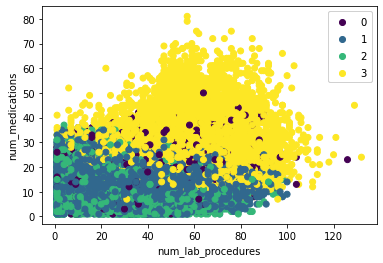

In [50]:
plot_clusters(df1, pred1k4, 7, 9)

### Version 2

#### K = 2

In [51]:
#50 minutes
get_best_kmeans_model(df2_dataScaled, df2_data, 2, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.18780076139335755
n_init: 5 max_iter: 50
score: 0.18796672528704306
n_init: 5 max_iter: 100
score: 0.18796672528704306
n_init: 5 max_iter: 200
score: 0.18796672528704306
n_init: 10 max_iter: 10
score: 0.18780076139335755
n_init: 10 max_iter: 50
score: 0.18796672528704306
n_init: 10 max_iter: 100
score: 0.18796672528704306
n_init: 10 max_iter: 200
score: 0.18796672528704306
n_init: 15 max_iter: 10
score: 0.18734238683832286
n_init: 15 max_iter: 50
score: 0.18793897936120246
n_init: 15 max_iter: 100
score: 0.18793897936120246
n_init: 15 max_iter: 200
score: 0.18793897936120246
n_init: 20 max_iter: 10
score: 0.18803727852244329
n_init: 20 max_iter: 50
score: 0.18793897936120246
n_init: 20 max_iter: 100
score: 0.18793897936120246
n_init: 20 max_iter: 200
score: 0.18793897936120246
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |   Silhouette Index   |

In [52]:
model2k2 = KMeans(n_clusters=2, init='k-means++', n_init=15, max_iter=50, random_state=1234)
pred2k2 = model2k2.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k2.n_iter_)

{0: 38151, 1: 63612}
23


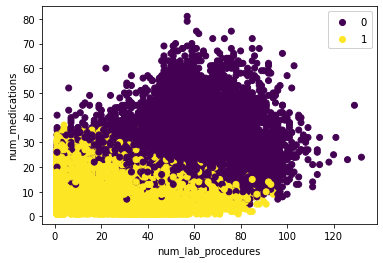

In [53]:
plot_clusters(df2, pred2k2, 7, 9)

#### K = 3

In [54]:
#50 minutes
get_best_kmeans_model(df2_dataScaled, df2_data, 3, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.022669909381645217
n_init: 5 max_iter: 50
score: 0.020523892957315906
n_init: 5 max_iter: 100
score: 0.020523892957315906
n_init: 5 max_iter: 200
score: 0.020523892957315906
n_init: 10 max_iter: 10
score: 0.05571657362751797
n_init: 10 max_iter: 50
score: 0.06351273335556878
n_init: 10 max_iter: 100
score: 0.06351273335556878
n_init: 10 max_iter: 200
score: 0.06351273335556878
n_init: 15 max_iter: 10
score: 0.05571657362751797
n_init: 15 max_iter: 50
score: 0.06351273335556878
n_init: 15 max_iter: 100
score: 0.06351273335556878
n_init: 15 max_iter: 200
score: 0.06351273335556878
n_init: 20 max_iter: 10
score: 0.05571657362751797
n_init: 20 max_iter: 50
score: 0.06430242446581667
n_init: 20 max_iter: 100
score: 0.06430242446581667
n_init: 20 max_iter: 200
score: 0.06430242446581667
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_iter |   Silhouette Index

In [55]:
model2k3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=50, random_state=1234)
pred2k3 = model2k3.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k3.n_iter_)

{0: 31751, 1: 60489, 2: 9523}
21


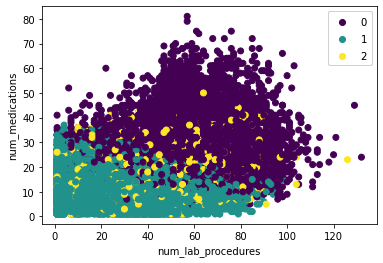

In [56]:
plot_clusters(df2, pred2k3, 7, 9)

#### K = 4

In [57]:
#50 minutes
get_best_kmeans_model(df2_dataScaled, df2_data, 4, [5,10,15,20], [10,50,100,200])

n_init: 5 max_iter: 10
score: 0.0053876133624413194
n_init: 5 max_iter: 50
score: 0.003978485725719379
n_init: 5 max_iter: 100
score: 0.003978485725719379
n_init: 5 max_iter: 200
score: 0.003978485725719379
n_init: 10 max_iter: 10
score: 0.0032578985380291195
n_init: 10 max_iter: 50
score: 0.0039815160167110415
n_init: 10 max_iter: 100
score: 0.0039815160167110415
n_init: 10 max_iter: 200
score: 0.0039815160167110415
n_init: 15 max_iter: 10
score: 0.0032578985380291195
n_init: 15 max_iter: 50
score: 0.0039815160167110415
n_init: 15 max_iter: 100
score: 0.0039815160167110415
n_init: 15 max_iter: 200
score: 0.0039815160167110415
n_init: 20 max_iter: 10
score: 0.0032578985380291195
n_init: 20 max_iter: 50
score: 0.0039815160167110415
n_init: 20 max_iter: 100
score: 0.0039815160167110415
n_init: 20 max_iter: 200
score: 0.0039815160167110415
+-------+----------+----------+----------------------+---------------------------+------------------------------------------+
|   K   |  n_init  | max_

In [58]:
model2k4 = KMeans(n_clusters=4, init='k-means++', n_init=5, max_iter=10, random_state=1234)
pred2k4 = model2k4.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k4.n_iter_)

{0: 43189, 1: 29751, 2: 7232, 3: 21591}
10


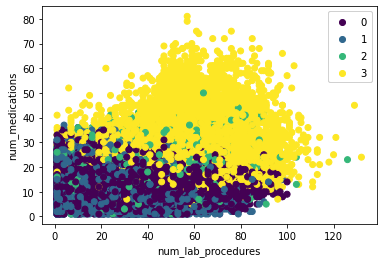

In [59]:
plot_clusters(df2, pred2k4, 7, 9)

## Gaussian mixture

In [38]:
def get_best_gaussian_model(data, data_org, n_components, max_iter_list, covariance_type_list):
    
    t = Texttable()
    t.header(['K', 'max_iter', 'covariance_type', 'Silhouette Index','Calinski-harabasz Index', 'Clusters distribution'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([2,8,15,17,24,40])

    for max_iter in max_iter_list:
        for covariance_type in covariance_type_list:
            print('max_iter:',max_iter,'covariance_type:',covariance_type)
            model = GaussianMixture(n_components=n_components, max_iter=max_iter, covariance_type=covariance_type, random_state=1234)
            pred = model.fit_predict(data)
            unique, counts = np.unique(pred, return_counts=True)
            score_silhouette = None
            score_calinski= None
            
            if (len(unique) > 1):
                score_silhouette = silhouette_score(data_org, pred, metric='euclidean')
                score_calinski = calinski_harabasz_score(data_org, pred)
            
            print('score:',score_silhouette)
            t.add_row([n_components, max_iter, covariance_type, score_silhouette, score_calinski, dict(zip(unique, counts))])

    
    print(t.draw())

### Version 1

#### K = 2

In [61]:
#3 hours
get_best_gaussian_model(df1_dataScaled,df1_data,2,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full
score: 0.013097312978255518
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.1317241484636129
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.013332739291178567
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.15231103412753394
max_iter: 50 covariance_type: full
score: 0.013097312978255518
max_iter: 50 covariance_type: tied
score: 0.012715570876625918
max_iter: 50 covariance_type: diag
score: 0.013332739291178567
max_iter: 50 covariance_type: spherical
score: 0.1523978744233211
max_iter: 100 covariance_type: full
score: 0.013097312978255518
max_iter: 100 covariance_type: tied
score: 0.012715570876625918
max_iter: 100 covariance_type: diag
score: 0.013332739291178567
max_iter: 100 covariance_type: spherical
score: 0.1523978744233211
max_iter: 200 covariance_type: full
score: 0.013097312978255518
max_iter: 200 covariance_type: tied
score: 0.012715570876625918
max_iter: 200 covariance_type: diag
score: 0.013332739291178567
max_iter: 200 covariance_type: spherical
score: 0.1523978744233211
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Silhouette Index  | Calinski-harabasz 

In [66]:
model1k2 = GaussianMixture(n_components=2, max_iter=50, covariance_type='spherical', random_state=1234)
pred1k2 = model1k2.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k2.n_iter_)

{0: 71129, 1: 30637}
14


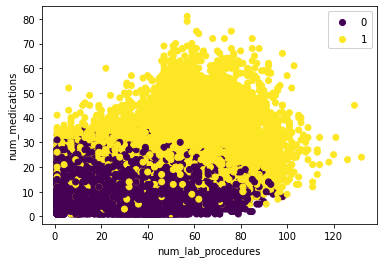

In [67]:
plot_clusters(df1, pred1k2, 7, 9)

#### K = 3

In [39]:
#3 hours
get_best_gaussian_model(df1_dataScaled,df1_data,3,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.03200263524109209
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.009016920680120246
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.02767576372141843
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.02924416364284674
max_iter: 50 covariance_type: full
score: -0.03200263524109209
max_iter: 50 covariance_type: tied
score: -0.008296897118686768
max_iter: 50 covariance_type: diag
score: -0.027684053085699722
max_iter: 50 covariance_type: spherical
score: 0.11976516181222006
max_iter: 100 covariance_type: full
score: -0.03200263524109209
max_iter: 100 covariance_type: tied
score: -0.008296897118686768
max_iter: 100 covariance_type: diag
score: -0.027684053085699722
max_iter: 100 covariance_type: spherical
score: 0.11976516181222006
max_iter: 200 covariance_type: full
score: -0.03200263524109209
max_iter: 200 covariance_type: tied
score: -0.008296897118686768
max_iter: 200 covariance_type: diag
score: -0.027684053085699722
max_iter: 200 covariance_type: spherical
score: 0.11976516181222006
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Silhouette Index  | Calinski-

In [40]:
model1k3 = GaussianMixture(n_components=3, max_iter=50, covariance_type='spherical', random_state=1234)
pred1k3 = model1k3.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k3.n_iter_)

{0: 5236, 1: 37203, 2: 59327}
29


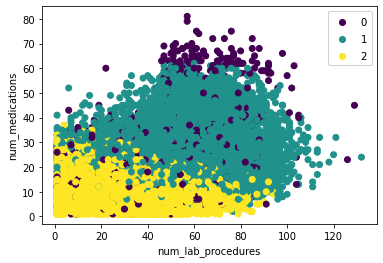

In [41]:
plot_clusters(df1, pred1k3, 7, 9)

#### K = 4

In [42]:
#3 hours
get_best_gaussian_model(df1_dataScaled,df1_data,4,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.061123949773350984
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.015130326476857706
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.058182088303483856
max_iter: 10 covariance_type: spherical
score: 0.011598554970608008
max_iter: 50 covariance_type: full
score: -0.061123949773350984
max_iter: 50 covariance_type: tied
score: -0.049066332552477686
max_iter: 50 covariance_type: diag
score: -0.058182088303483856
max_iter: 50 covariance_type: spherical
score: 0.011598554970608008
max_iter: 100 covariance_type: full
score: -0.061123949773350984
max_iter: 100 covariance_type: tied
score: -0.049066332552477686
max_iter: 100 covariance_type: diag
score: -0.058182088303483856
max_iter: 100 covariance_type: spherical
score: 0.011598554970608008
max_iter: 200 covariance_type: full
score: -0.061123949773350984
max_iter: 200 covariance_type: tied
score: -0.049066332552477686
max_iter: 200 covariance_type: diag
score: -0.058182088303483856
max_iter: 200 covariance_type: spherical
score: 0.011598554970608008
+----+----------+-----------------+-------------------+--------------------------+---------------------------------

In [43]:
model1k4 = GaussianMixture(n_components=4, max_iter=50, covariance_type='spherical', random_state=1234)
pred1k4 = model1k4.fit_predict(df1_dataScaled)
unique, counts = np.unique(pred1k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model1k4.n_iter_)

{0: 42313, 1: 5002, 2: 29280, 3: 25171}
10


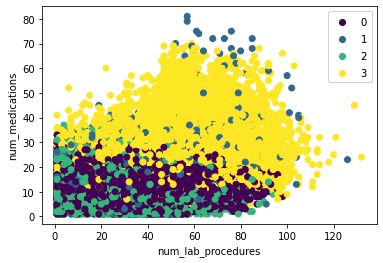

In [44]:
plot_clusters(df1, pred1k4, 7, 9)

### Version 2

#### K = 2

In [68]:
#45 minutes
get_best_gaussian_model(df2_dataScaled,df2_data,2,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full
score: 0.027030163171965514
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.13903554588296865
max_iter: 10 covariance_type: diag
score: 0.023143920953528328
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.15444925523243186
max_iter: 50 covariance_type: full
score: 0.027030163171965514
max_iter: 50 covariance_type: tied
score: 0.12742667280837058
max_iter: 50 covariance_type: diag
score: 0.023143920953528328
max_iter: 50 covariance_type: spherical
score: 0.15480410682701182
max_iter: 100 covariance_type: full
score: 0.027030163171965514
max_iter: 100 covariance_type: tied
score: 0.12742667280837058
max_iter: 100 covariance_type: diag
score: 0.023143920953528328
max_iter: 100 covariance_type: spherical
score: 0.15480410682701182
max_iter: 200 covariance_type: full
score: 0.027030163171965514
max_iter: 200 covariance_type: tied
score: 0.12742667280837058
max_iter: 200 covariance_type: diag
score: 0.023143920953528328
max_iter: 200 covariance_type: spherical
score: 0.15480410682701182
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Silhouette Index  | Calinski-harabasz 

In [69]:
model2k2 = GaussianMixture(n_components=2, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k2 = model2k2.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k2.n_iter_)

{0: 73893, 1: 27870}
11


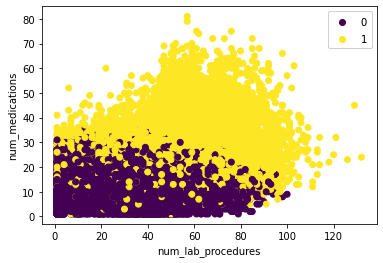

In [70]:
plot_clusters(df2, pred2k2, 7, 9)

#### K = 3

In [71]:
#45 minutes
get_best_gaussian_model(df2_dataScaled,df2_data,3,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full
score: -0.020151648231982365
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.007813967913432255
max_iter: 10 covariance_type: diag
score: -0.018528712125202174
max_iter: 10 covariance_type: spherical


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: 0.025252041030518278
max_iter: 50 covariance_type: full
score: -0.020151648231982365
max_iter: 50 covariance_type: tied
score: -0.008820911593151329
max_iter: 50 covariance_type: diag
score: -0.018528712125202174
max_iter: 50 covariance_type: spherical
score: 0.11916011909602754
max_iter: 100 covariance_type: full
score: -0.020151648231982365
max_iter: 100 covariance_type: tied
score: -0.008820911593151329
max_iter: 100 covariance_type: diag
score: -0.018528712125202174
max_iter: 100 covariance_type: spherical
score: 0.11916011909602754
max_iter: 200 covariance_type: full
score: -0.020151648231982365
max_iter: 200 covariance_type: tied
score: -0.008820911593151329
max_iter: 200 covariance_type: diag
score: -0.018528712125202174
max_iter: 200 covariance_type: spherical
score: 0.11916011909602754
+----+----------+-----------------+-------------------+--------------------------+------------------------------------------+
| K  | max_iter | covariance_type | Silhouette Index  | Calin

In [72]:
model2k3 = GaussianMixture(n_components=3, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k3 = model2k3.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k3, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k3.n_iter_)

{0: 34729, 1: 62183, 2: 4851}
25


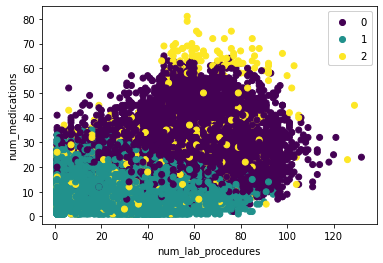

In [73]:
plot_clusters(df2, pred2k3, 7, 9)

#### K = 4

In [74]:
#45 minutes
get_best_gaussian_model(df2_dataScaled,df2_data,4,[10,50,100,200],['full','tied','diag','spherical'])

max_iter: 10 covariance_type: full


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.03111841805191339
max_iter: 10 covariance_type: tied


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.012556278953562015
max_iter: 10 covariance_type: diag


C:\Users\Edurne\anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


score: -0.021868228496393763
max_iter: 10 covariance_type: spherical
score: 0.011833806636315414
max_iter: 50 covariance_type: full
score: -0.031397002753577714
max_iter: 50 covariance_type: tied
score: -0.013833000422228611
max_iter: 50 covariance_type: diag
score: -0.02209946795667988
max_iter: 50 covariance_type: spherical
score: 0.011833806636315414
max_iter: 100 covariance_type: full
score: -0.031397002753577714
max_iter: 100 covariance_type: tied
score: -0.013833000422228611
max_iter: 100 covariance_type: diag
score: -0.02209946795667988
max_iter: 100 covariance_type: spherical
score: 0.011833806636315414
max_iter: 200 covariance_type: full
score: -0.031397002753577714
max_iter: 200 covariance_type: tied
score: -0.013833000422228611
max_iter: 200 covariance_type: diag
score: -0.02209946795667988
max_iter: 200 covariance_type: spherical
score: 0.011833806636315414
+----+----------+-----------------+-------------------+--------------------------+------------------------------------

In [75]:
model2k4 = GaussianMixture(n_components=4, max_iter=50, covariance_type='spherical', random_state=1234)
pred2k4 = model2k4.fit_predict(df2_dataScaled)
unique, counts = np.unique(pred2k4, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k4.n_iter_)

{0: 24676, 1: 43198, 2: 4797, 3: 29092}
7


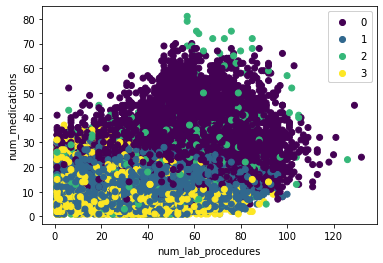

In [76]:
plot_clusters(df2, pred2k4, 7, 9)

## BIRCH

In [38]:
def get_best_birch_model(data,data_sample,data_org, n_clusters, threshold_list, branching_factor_list):
    
    t = Texttable()
    t.header(['K', 'threshold', 'branching_factor', 'Silhouette Index','Calinski-harabasz Index', 'Clusters distribution'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([2,9,16,17,24,40])
    
    for threshold in threshold_list:
        for branching_factor in branching_factor_list:
            print("threshold:", threshold, "branching_factor:",branching_factor)
            model = Birch(n_clusters=n_clusters, threshold=threshold, branching_factor=branching_factor)
            model.fit(data_sample)
            pred = model.predict(data)
            unique, counts = np.unique(pred, return_counts=True)
            score_silhouette = None
            score_calinski= None
            
            if (len(unique) > 1):
                score_silhouette = silhouette_score(data_org, pred, metric='euclidean')
                score_calinski = calinski_harabasz_score(data_org, pred)
                
            print("score:",score_silhouette)
            t.add_row([n_clusters, threshold, branching_factor, score_silhouette, score_calinski, dict(zip(unique, counts))])

    print(t.draw())

### Version 1

#### K = 2

In [41]:
#9 hours y 30 minutes
get_best_birch_model(df1_dataScaled,df1_sample,df1_data,2,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.08895792812539943
threshold: 0.1 branching_factor: 150
score: 0.08872170288685464
threshold: 0.1 branching_factor: 500
score: 0.09336622686456769
threshold: 0.5 branching_factor: 50
score: 0.09153662306159224
threshold: 0.5 branching_factor: 150
score: 0.0864129204380096
threshold: 0.5 branching_factor: 500
score: 0.1590445443546314
threshold: 1.5 branching_factor: 50
score: 0.0871023966364265
threshold: 1.5 branching_factor: 150
score: 0.0779380921421362
threshold: 1.5 branching_factor: 500
score: 0.16358235539796467
threshold: 2 branching_factor: 50
score: 0.08744435248333782
threshold: 2 branching_factor: 150
score: 0.08645612026683888
threshold: 2 branching_factor: 500
score: -0.0024747144565642797
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Silhouette Index  | Calinski-harabasz Index  |          Clusters distribution

In [42]:
model1k2 = Birch(n_clusters=2, threshold=1.5, branching_factor=500)
model1k2.fit(df1_sample)
pred1k2 = model1k2.predict(df1_dataScaled)
unique, counts = np.unique(pred1k2, return_counts=True)
print(dict(zip(unique, counts)))

{0: 88963, 1: 12803}


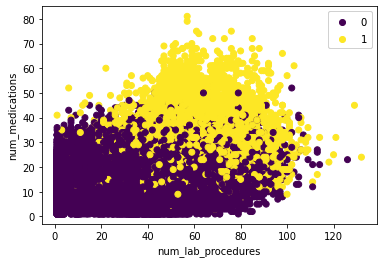

In [43]:
plot_clusters(df1, pred1k2, 7, 9)

#### k = 3

In [39]:
#9 hours y 30 minutes
get_best_birch_model(df1_dataScaled,df1_sample,df1_data,3,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.009463748483229633
threshold: 0.1 branching_factor: 150
score: 0.013680335686114022
threshold: 0.1 branching_factor: 500
score: 0.00816098435433102
threshold: 0.5 branching_factor: 50
score: 0.010154878674639562
threshold: 0.5 branching_factor: 150
score: 0.006945363335712677
threshold: 0.5 branching_factor: 500
score: 0.006942609815957839
threshold: 1.5 branching_factor: 50
score: 0.007420424209094736
threshold: 1.5 branching_factor: 150
score: 0.0073312451526400535
threshold: 1.5 branching_factor: 500
score: 0.0154009222896392
threshold: 2 branching_factor: 50
score: 0.018073203868793342
threshold: 2 branching_factor: 150
score: 0.017269021260289365
threshold: 2 branching_factor: 500
score: 0.00490616703189275
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Silhouette Index  | Calinski-harabasz Index  |          Clusters di

In [42]:
model1k3 = Birch(n_clusters=3, threshold=2, branching_factor=150)
model1k3.fit(df1_sample)
pred1k3 = model1k3.predict(df1_dataScaled)
unique, counts = np.unique(pred1k3, return_counts=True)
print(dict(zip(unique, counts)))

{0: 14454, 1: 75368, 2: 11944}


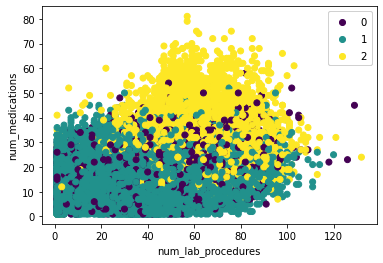

In [43]:
plot_clusters(df1, pred1k3, 7, 9)

#### K = 4

In [40]:
#9 hours y 30 minutes
get_best_birch_model(df1_dataScaled,df1_sample,df1_data,4,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: -0.0431317192752818
threshold: 0.1 branching_factor: 150
score: -0.010145668446309989
threshold: 0.1 branching_factor: 500
score: -0.016628448185859738
threshold: 0.5 branching_factor: 50
score: -0.015742139879197523
threshold: 0.5 branching_factor: 150
score: -0.019765246369137162
threshold: 0.5 branching_factor: 500
score: -0.018960950395090357
threshold: 1.5 branching_factor: 50
score: -0.015070278682398922
threshold: 1.5 branching_factor: 150
score: -0.006195715483168327
threshold: 1.5 branching_factor: 500
score: -0.0037970348074414977
threshold: 2 branching_factor: 50
score: 0.0024942744384684238
threshold: 2 branching_factor: 150
score: -0.00311076580368766
threshold: 2 branching_factor: 500
score: -0.0063183205617914585
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Silhouette Index  | Calinski-harabasz Index  |       

In [44]:
model1k4 = Birch(n_clusters=4, threshold=2, branching_factor=50)
model1k4.fit(df1_sample)
pred1k4 = model1k4.predict(df1_dataScaled)
unique, counts = np.unique(pred1k4, return_counts=True)
print(dict(zip(unique, counts)))

{0: 8842, 1: 77895, 2: 10545, 3: 4484}


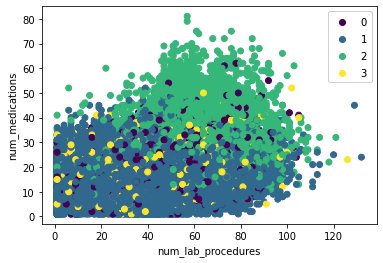

In [45]:
plot_clusters(df1, pred1k4, 7, 9)

### Version 2

#### K = 2

In [39]:
#2 hours
get_best_birch_model(df2_dataScaled,df2_sample,df2_data,2,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.08656035044158321
threshold: 0.1 branching_factor: 150
score: 0.08921490052002025
threshold: 0.1 branching_factor: 500
score: 0.08833938513042329
threshold: 0.5 branching_factor: 50
score: 0.07860795796608494
threshold: 0.5 branching_factor: 150
score: 0.09511129673474757
threshold: 0.5 branching_factor: 500
score: 0.08668729441597518
threshold: 1.5 branching_factor: 50
score: -0.001888818436061785
threshold: 1.5 branching_factor: 150
score: 0.14474785318103056
threshold: 1.5 branching_factor: 500
score: 0.07210679687260955
threshold: 2 branching_factor: 50
score: 0.15181203988588635
threshold: 2 branching_factor: 150
score: 0.0015881757433312443
threshold: 2 branching_factor: 500
score: 0.0956726691869132
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Silhouette Index  | Calinski-harabasz Index  |          Clusters distribu

In [40]:
model2k2 = Birch(n_clusters=2, threshold=2, branching_factor=50)
model2k2.fit(df2_sample)
pred2k2 = model2k2.predict(df2_dataScaled)
unique, counts = np.unique(pred2k2, return_counts=True)
print(dict(zip(unique, counts)))

{0: 86034, 1: 15729}


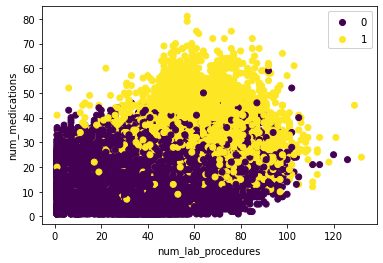

In [41]:
plot_clusters(df2, pred2k2, 7, 9)

#### k = 3

In [42]:
#2 hours
get_best_birch_model(df2_dataScaled,df2_sample,df2_data,3,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: 0.010127097937733818
threshold: 0.1 branching_factor: 150
score: 0.021189728451677194
threshold: 0.1 branching_factor: 500
score: 0.011773497828924118
threshold: 0.5 branching_factor: 50
score: 0.013664770158066669
threshold: 0.5 branching_factor: 150
score: 0.01579379297187454
threshold: 0.5 branching_factor: 500
score: 0.0141509653377532
threshold: 1.5 branching_factor: 50
score: 0.0019196968187833615
threshold: 1.5 branching_factor: 150
score: 0.013476278995596216
threshold: 1.5 branching_factor: 500
score: 0.008121145932641169
threshold: 2 branching_factor: 50
score: -0.0010167566779885175
threshold: 2 branching_factor: 150
score: 0.018093338846451767
threshold: 2 branching_factor: 500
score: 0.0636658663968573
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Silhouette Index  | Calinski-harabasz Index  |          Clusters d

In [49]:
model2k3 = Birch(n_clusters=3, threshold=2, branching_factor=500)
model2k3.fit(df2_sample)
pred2k3 = model2k3.predict(df2_dataScaled)
unique, counts = np.unique(pred2k3, return_counts=True)
print(dict(zip(unique, counts)))

{0: 1158, 1: 64769, 2: 35836}


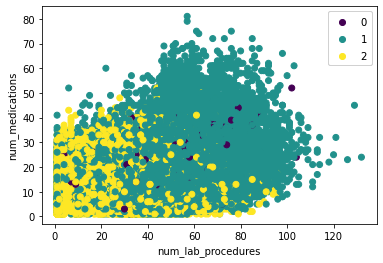

In [50]:
plot_clusters(df2, pred2k3, 7, 9)

#### k = 4

In [39]:
#2 hours
get_best_birch_model(df2_dataScaled,df2_sample,df2_data,4,[0.1,0.5,1.5,2],[50,150,500])

threshold: 0.1 branching_factor: 50
score: -0.004206366984417399
threshold: 0.1 branching_factor: 150
score: 0.007627464486195624
threshold: 0.1 branching_factor: 500
score: 0.0002035267182836086
threshold: 0.5 branching_factor: 50
score: 0.0004567590173608402
threshold: 0.5 branching_factor: 150
score: 0.0034211296204191993
threshold: 0.5 branching_factor: 500
score: -0.005664618737858248
threshold: 1.5 branching_factor: 50
score: -0.017719358251804918
threshold: 1.5 branching_factor: 150
score: -0.005851655573389418
threshold: 1.5 branching_factor: 500
score: -0.008116067415430046
threshold: 2 branching_factor: 50
score: -0.008761651014685033
threshold: 2 branching_factor: 150
score: -0.0057821358783400265
threshold: 2 branching_factor: 500
score: 0.05428229460067358
+----+-----------+------------------+-------------------+--------------------------+------------------------------------------+
| K  | threshold | branching_factor | Silhouette Index  | Calinski-harabasz Index  |        

In [40]:
model2k4 = Birch(n_clusters=4, threshold=2, branching_factor=500)
model2k4.fit(df2_sample)
pred2k4 = model2k4.predict(df2_dataScaled)
unique, counts = np.unique(pred2k4, return_counts=True)
print(dict(zip(unique, counts)))

{0: 64769, 1: 913, 2: 35836, 3: 245}


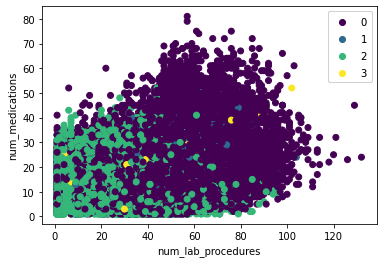

In [41]:
plot_clusters(df2, pred2k4, 7, 9)

## DBSCAN

In [45]:
def get_best_dbscan_model(data, data_org, eps_list, min_samples_list, metric):
    
    t = Texttable()
    t.header(['metric', 'eps', 'min_samples', 'Silhouette Index', 'Calinski-Harabasz Index', 'Clusters distribution'])
    t.set_cols_align(["c","c","c","c","c","c"])
    t.set_cols_width([13,8,8,20,25,30])
    
    for eps in eps_list:
        for min_samples in min_samples_list:
            print("Eps: ",eps, "min_samples: ", min_samples)
            model = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
            pred = model.fit_predict(data)
            unique, counts = np.unique(pred, return_counts=True)
            score_silhouette = None
            score_calinski= None
            if (len(unique) > 1):
                score_silhouette = silhouette_score(data_org, pred, metric='euclidean')
                score_calinski = calinski_harabasz_score(data_org, pred)
                
            print("score:",score_silhouette)
            t.add_row([metric, eps, min_samples, score_silhouette, score_calinski, dict(zip(unique, counts))])  
            
    print(t.draw())

### Version 1

#### Euclidean

In [46]:
#3 hours
get_best_dbscan_model(df1_data, df1_data, [0.5,2,5,8,10], [100,2000,5000,10000], "euclidean")

Eps:  0.5 min_samples:  100
score: None
Eps:  0.5 min_samples:  2000
score: None
Eps:  0.5 min_samples:  5000
score: None
Eps:  0.5 min_samples:  10000
score: None
Eps:  2 min_samples:  100
score: None
Eps:  2 min_samples:  2000
score: None
Eps:  2 min_samples:  5000
score: None
Eps:  2 min_samples:  10000
score: None
Eps:  5 min_samples:  100
score: 0.16489870100605303
Eps:  5 min_samples:  2000
score: None
Eps:  5 min_samples:  5000
score: None
Eps:  5 min_samples:  10000
score: None
Eps:  8 min_samples:  100
score: 0.4233650232469611
Eps:  8 min_samples:  2000
score: 0.33253857571567713
Eps:  8 min_samples:  5000
score: 0.3048381726562592
Eps:  8 min_samples:  10000
score: 0.08088826262854554
Eps:  10 min_samples:  100
score: 0.4646630959595114
Eps:  10 min_samples:  2000
score: 0.41382552683925294
Eps:  10 min_samples:  5000
score: 0.3679803628791608
Eps:  10 min_samples:  10000
score: 0.3559970271588316
+---------------+----------+----------+----------------------+----------------

In [47]:
model1Eucl = DBSCAN(eps=10, min_samples=5000, metric="euclidean")
pred1Eucl = model1Eucl.fit_predict(df1_data)
unique, counts = np.unique(pred1Eucl, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 5277, 0: 96489}


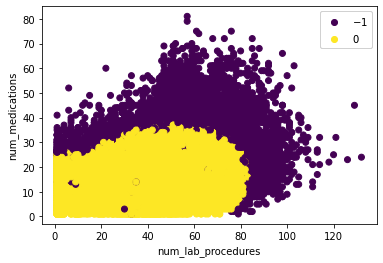

In [48]:
plot_clusters(df1, pred1Eucl, 7, 9)

### Version 2

#### Euclidean

In [49]:
#1 hour
get_best_dbscan_model(df2_data, df2_data, [0.5,2,5,8,10], [100,2000,5000,10000], "euclidean")

Eps:  0.5 min_samples:  100
score: None
Eps:  0.5 min_samples:  2000
score: None
Eps:  0.5 min_samples:  5000
score: None
Eps:  0.5 min_samples:  10000
score: None
Eps:  2 min_samples:  100
score: None
Eps:  2 min_samples:  2000
score: None
Eps:  2 min_samples:  5000
score: None
Eps:  2 min_samples:  10000
score: None
Eps:  5 min_samples:  100
score: 0.20113946138637634
Eps:  5 min_samples:  2000
score: None
Eps:  5 min_samples:  5000
score: None
Eps:  5 min_samples:  10000
score: None
Eps:  8 min_samples:  100
score: 0.4295532184650319
Eps:  8 min_samples:  2000
score: 0.33994173268759137
Eps:  8 min_samples:  5000
score: 0.31575604105241073
Eps:  8 min_samples:  10000
score: 0.1089927391557527
Eps:  10 min_samples:  100
score: 0.465582905475064
Eps:  10 min_samples:  2000
score: 0.4172077259707248
Eps:  10 min_samples:  5000
score: 0.3718678336591067
Eps:  10 min_samples:  10000
score: 0.36158781587057565
+---------------+----------+----------+----------------------+-----------------

In [50]:
model2Eucl = DBSCAN(eps=10, min_samples=5000, metric="euclidean")
pred2Eucl = model2Eucl.fit_predict(df2_data)
unique, counts = np.unique(pred2Eucl, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 5038, 0: 96725}


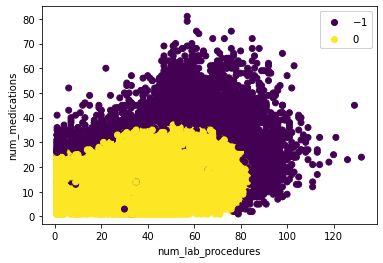

In [51]:
plot_clusters(df2, pred2Eucl, 7, 9)

#### Manhattan

In [52]:
#3 hours
get_best_dbscan_model(df2_data, df2_data, [20,25,30], [100,2000,5000,10000], "manhattan")

Eps:  20 min_samples:  100
score: 0.28341346521620314
Eps:  20 min_samples:  2000
score: 0.08172551789031729
Eps:  20 min_samples:  5000
score: None
Eps:  20 min_samples:  10000
score: None
Eps:  25 min_samples:  100
score: 0.42145803459127845
Eps:  25 min_samples:  2000
score: 0.3004856589629639
Eps:  25 min_samples:  5000
score: 0.2803266955191452
Eps:  25 min_samples:  10000
score: 2.649440002306405e-05
Eps:  30 min_samples:  100
score: 0.472307793461228
Eps:  30 min_samples:  2000
score: 0.42091737826368597
Eps:  30 min_samples:  5000
score: 0.3703274759480583
Eps:  30 min_samples:  10000
score: 0.3638098897118523
+---------------+----------+----------+----------------------+---------------------------+--------------------------------+
|    metric     |   eps    | min_samp |   Silhouette Index   |  Calinski-Harabasz Index  |     Clusters distribution      |
|               |          |   les    |                      |                           |                                |
+=

In [38]:
model2Manh = DBSCAN(eps=30, min_samples=10000, metric="manhattan")
pred2Manh = model2Manh.fit_predict(df2_data)
unique, counts = np.unique(pred2Manh, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 18379, 0: 83384}


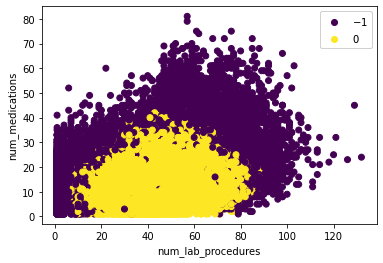

In [39]:
plot_clusters(df2, pred2Manh, 7, 9)

## Results analysis

In [42]:
def plot_numeric_means(df):
    
    #Obtain numerical variables
    numeric = df2[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
    
    #Calculate the means of each numerical variable in each cluster
    mean_0 = []
    mean_1 = []
    for var in numeric:
        mean_0.append(df.groupby(['Cluster'])[var].mean().values[0])
        mean_1.append(df.groupby(['Cluster'])[var].mean().values[1])

    r = np.arange(8)
    width = 0.25

    plt.bar(r, mean_0, width = width, edgecolor = 'black', label='0')
    plt.bar(r + width, mean_1, width = width, edgecolor = 'black', label='1')
    plt.xticks(r + width/2,numeric,rotation = 90)
    plt.legend()
    plt.show()

    t = Texttable()
    t.header(['Variable', 'Cluster 0', 'Cluster 1'])
    t.set_cols_align(["c","c","c"])
    t.set_cols_width([18,10,10])
    i=0
    for var in numeric:
        t.add_row([var, mean_0[i], mean_1[i]])
        i += 1

    print(t.draw())

In [43]:
def plot_categorical_variable(df):
    
    numeric = df2[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]

    #Obtain categorical variables
    categorical_df2 = df[df.drop(numeric.columns,axis=1).columns]

    #Drawe categorical variables
    for var in categorical_df2.columns:
        df.groupby([var])['Cluster'].value_counts().unstack().plot(kind='bar',stacked = False)

### K-means k=2 version 2

In [44]:
modelKmeans = KMeans(n_clusters=2, init='k-means++', n_init=15, max_iter=50, random_state=1234)
predKmeans = modelKmeans.fit_predict(df2_dataScaled)
unique, counts = np.unique(predKmeans, return_counts=True)
print(dict(zip(unique, counts)))
print(modelKmeans.n_iter_)

{0: 38151, 1: 63612}
23


In [45]:
df2_kmeans = df2.copy()

#Add a new column with the prediction of k-means k=2
df2_kmeans2 = df2_kmeans.insert(38,"Cluster",predKmeans,True)

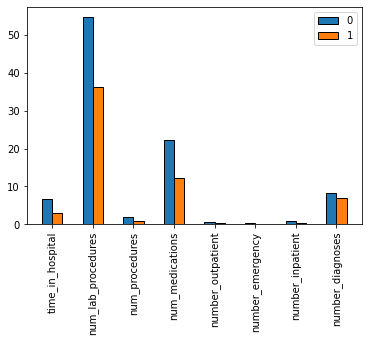

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   6.809    |   2.949    |
+--------------------+------------+------------+
| num_lab_procedures |   54.592   |   36.201   |
+--------------------+------------+------------+
|   num_procedures   |   2.017    |   0.934    |
+--------------------+------------+------------+
|  num_medications   |   22.373   |   12.213   |
+--------------------+------------+------------+
| number_outpatient  |   0.513    |   0.283    |
+--------------------+------------+------------+
|  number_emergency  |   0.292    |   0.141    |
+--------------------+------------+------------+
|  number_inpatient  |   0.942    |   0.452    |
+--------------------+------------+------------+
|  number_diagnoses  |   8.393    |   6.841    |
+--------------------+------------+------------+


In [46]:
#Plot the means of the numerical variables
plot_numeric_means(df2_kmeans)

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


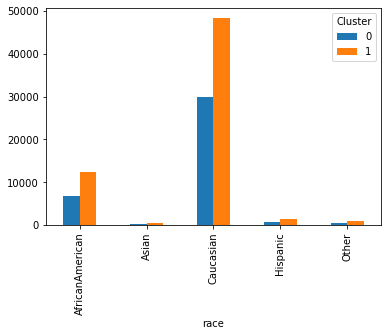

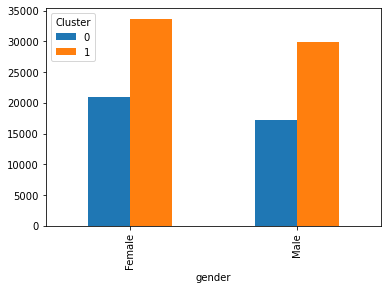

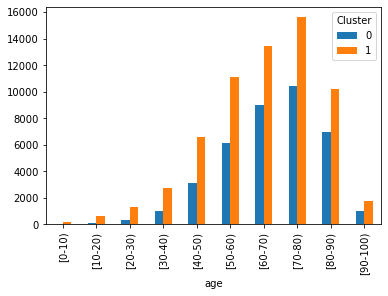

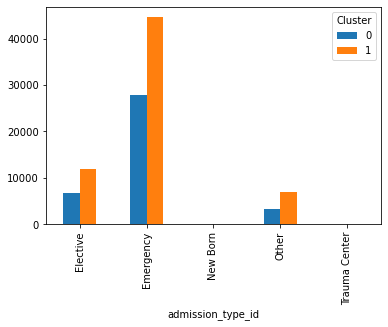

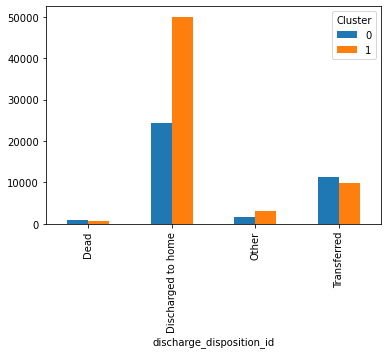

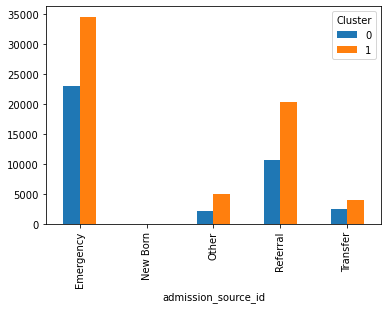

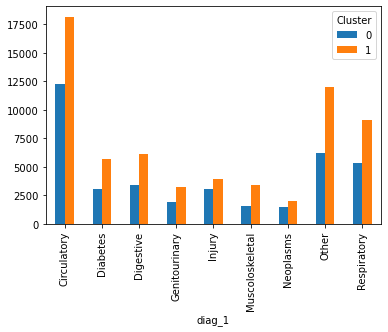

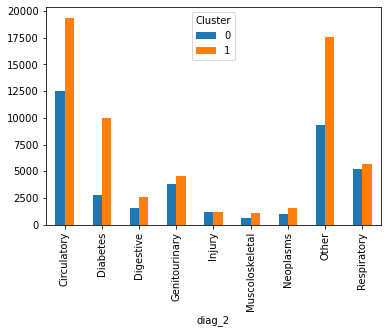

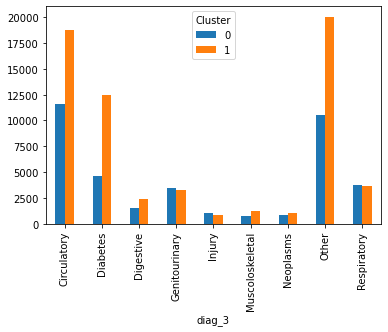

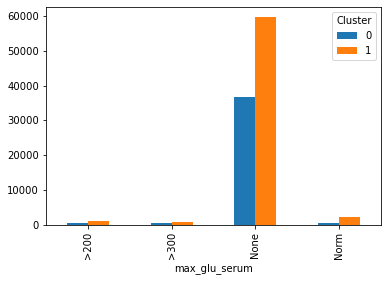

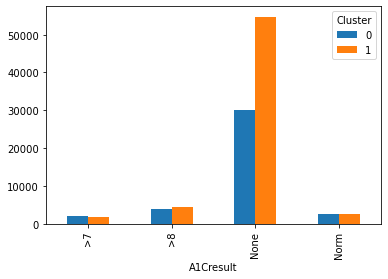

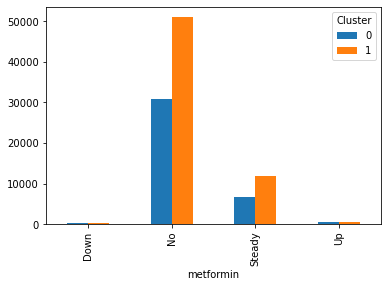

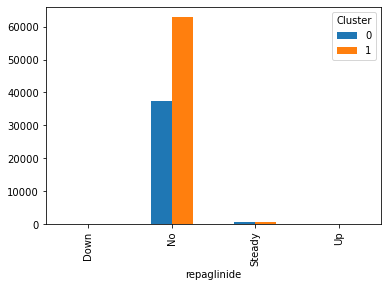

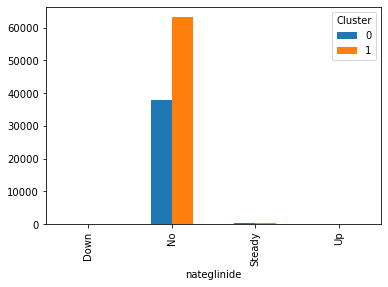

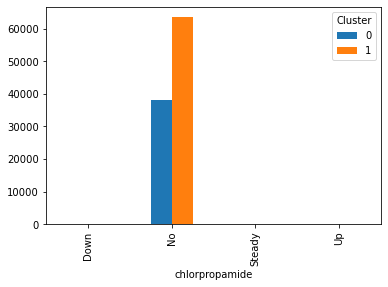

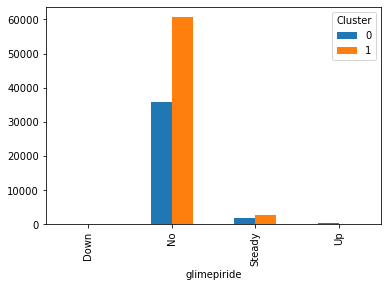

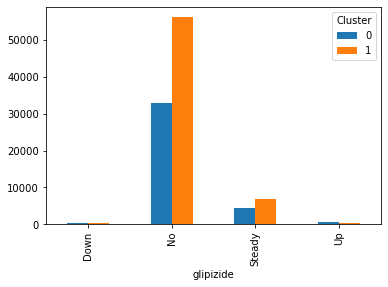

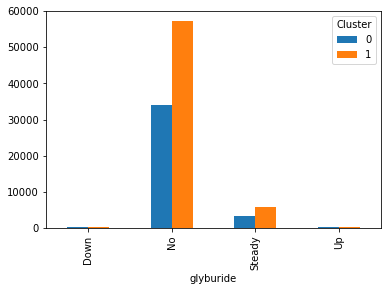

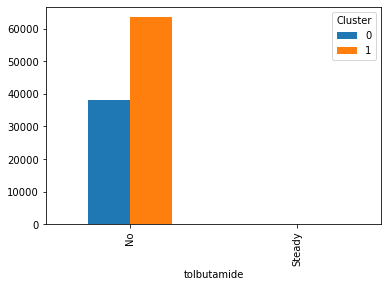

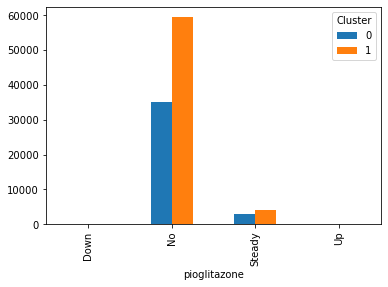

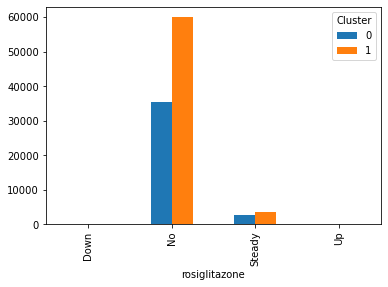

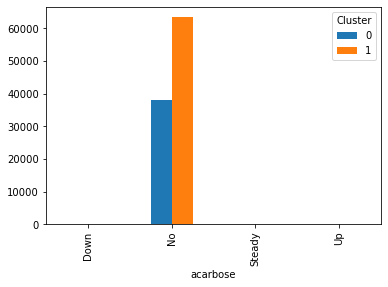

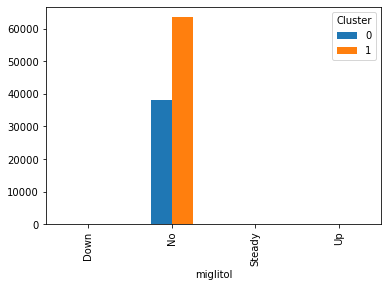

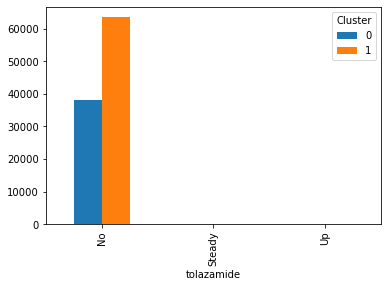

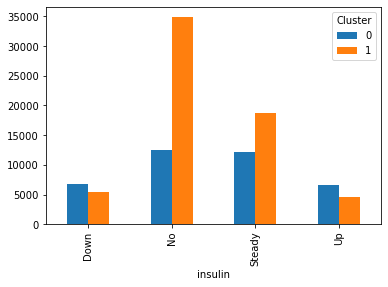

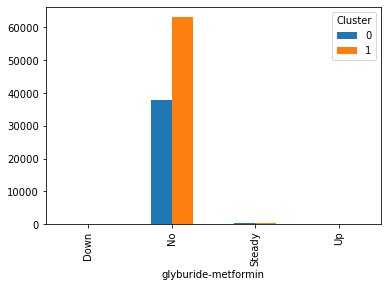

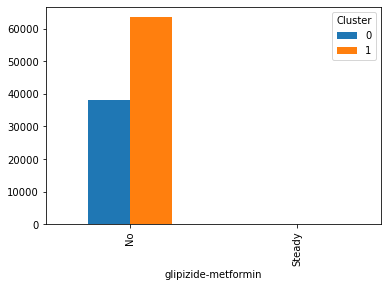

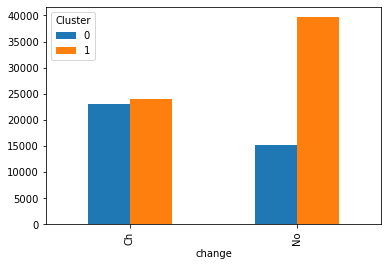

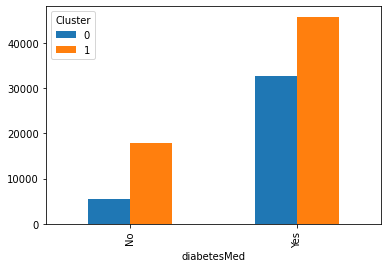

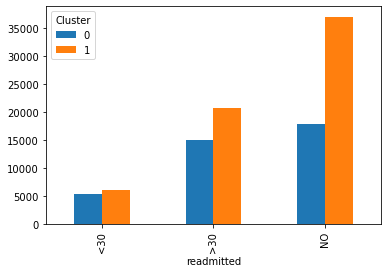

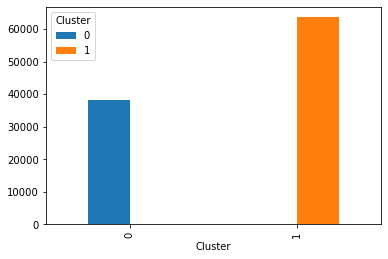

In [47]:
#Draw the total number of patients in each categorical variable
plot_categorical_variable(df2_kmeans)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


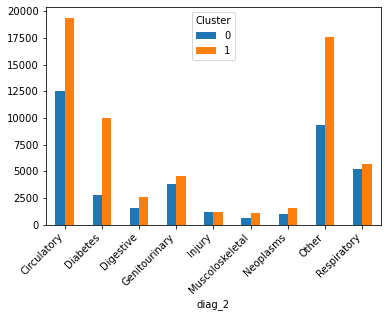

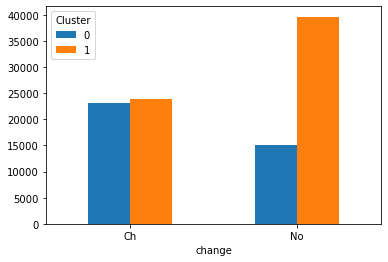

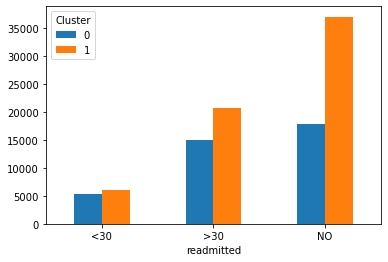

In [48]:
#Save categorical variable graphics in .eps format
df2_kmeans.groupby(['diag_2'])['Cluster'].value_counts().unstack().plot(kind='bar',stacked = False)
plt.xticks(rotation=45, ha='right')
plt.savefig('diag_2.eps',bbox_inches = 'tight')

df2_kmeans.groupby(['change'])['Cluster'].value_counts().unstack().plot(kind='bar',stacked = False)
plt.xticks(rotation=0)
plt.savefig('change.eps',bbox_inches = 'tight')

df2_kmeans.groupby(['readmitted'])['Cluster'].value_counts().unstack().plot(kind='bar',stacked = False)
plt.xticks(rotation=0)
plt.savefig('readmitted.eps',bbox_inches = 'tight')

In [49]:
#Create and export dataframe with centroids of both clusters
dfCenters = pd.DataFrame()
dfCenters['Variable'] = df2_data.columns
dfCenters['Cluster 0'] = modelKmeans.cluster_centers_[0]
dfCenters['Cluster 1'] = modelKmeans.cluster_centers_[1]
dfCenters.to_excel('Centroids.xlsx', index=False)

### Gaussian Mixture  k=2 version 2

In [56]:
model2k2 = GaussianMixture(n_components=2, max_iter=50, covariance_type='spherical', random_state=1234)
predGmk2 = model2k2.fit_predict(df2_dataScaled)
unique, counts = np.unique(predGmk2, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k2.n_iter_)

{0: 73893, 1: 27870}
11


In [57]:
df2_gm2 = df2.copy()

df2_gm = df2_gm2.insert(38,"Cluster",predGmk2,True)

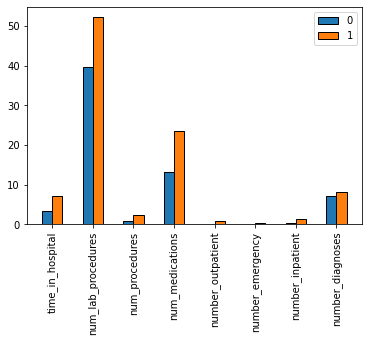

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   3.366    |   7.128    |
+--------------------+------------+------------+
| num_lab_procedures |   39.673   |   52.171   |
+--------------------+------------+------------+
|   num_procedures   |   0.948    |   2.378    |
+--------------------+------------+------------+
|  num_medications   |   13.220   |   23.451   |
+--------------------+------------+------------+
| number_outpatient  |   0.191    |   0.844    |
+--------------------+------------+------------+
|  number_emergency  |   0.092    |   0.478    |
+--------------------+------------+------------+
|  number_inpatient  |   0.394    |   1.277    |
+--------------------+------------+------------+
|  number_diagnoses  |   7.132    |   8.192    |
+--------------------+------------+------------+


In [58]:
#Plot the means of the numerical variables
plot_numeric_means(df2_gm2)

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


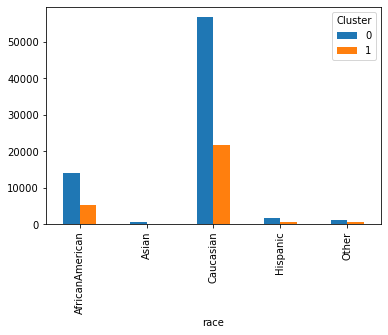

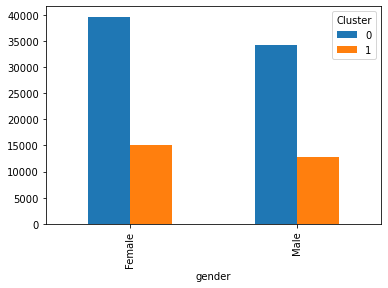

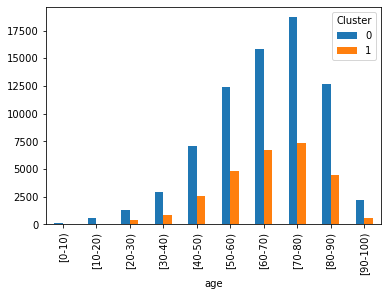

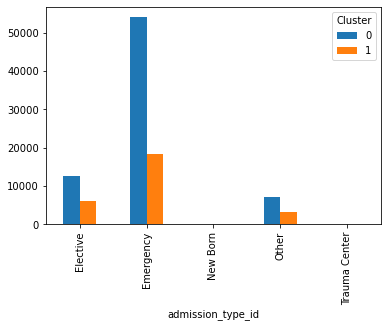

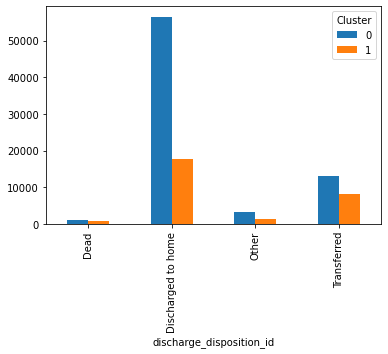

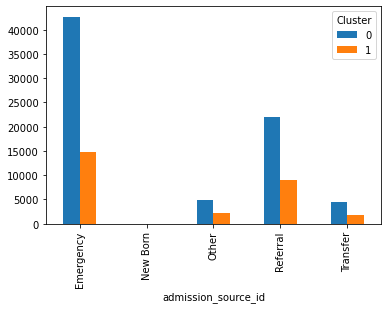

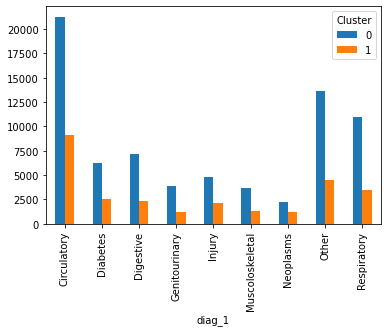

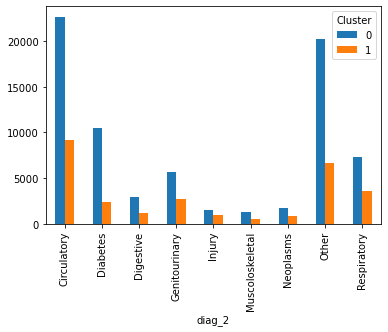

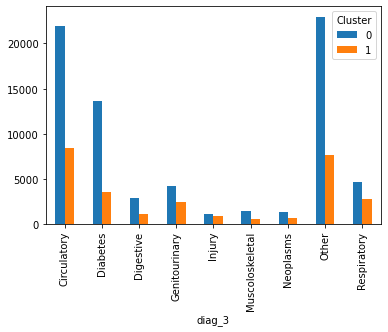

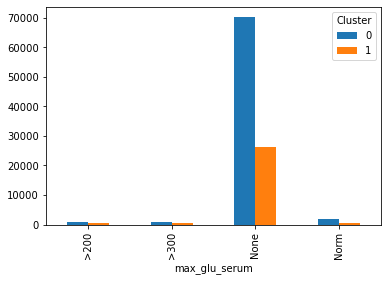

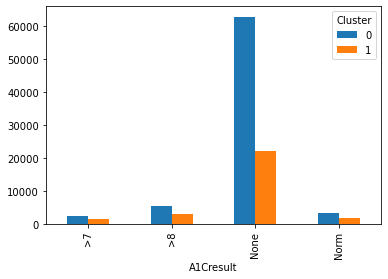

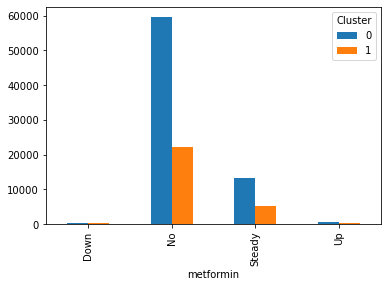

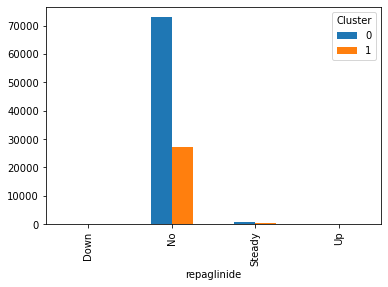

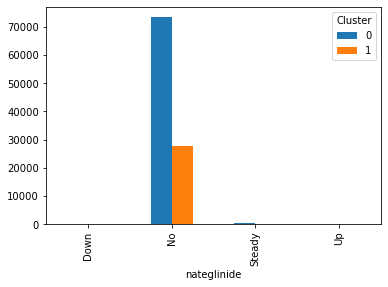

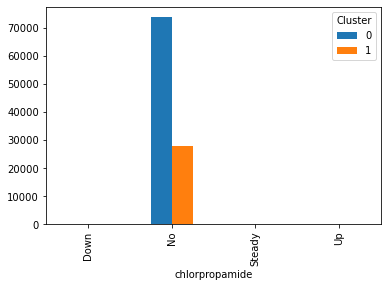

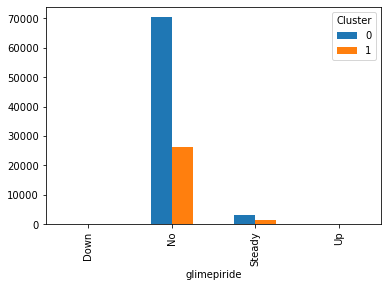

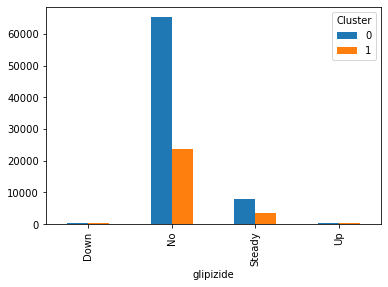

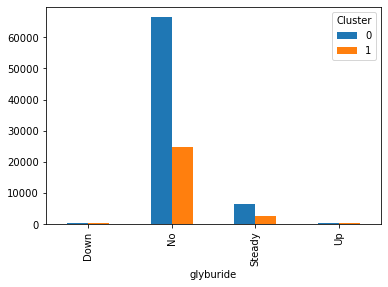

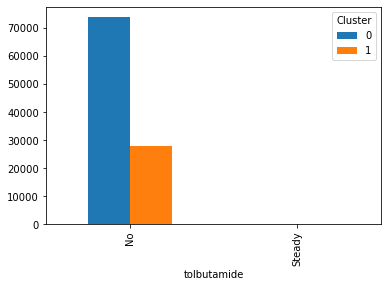

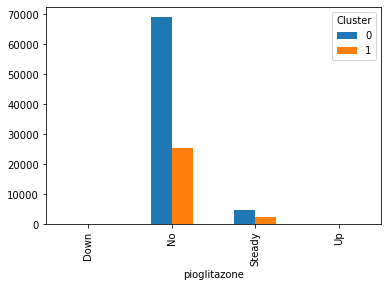

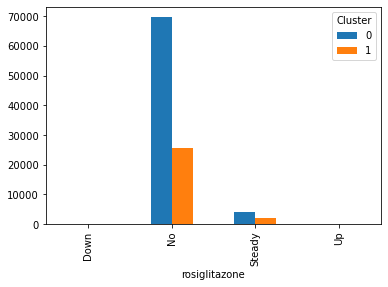

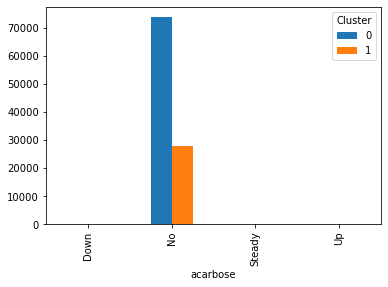

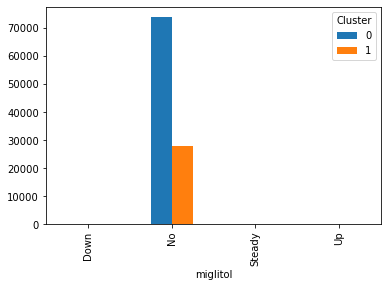

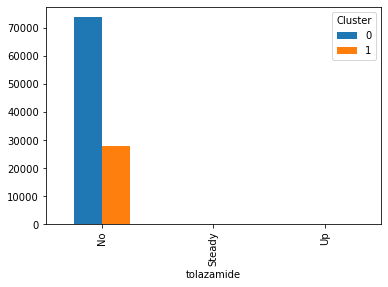

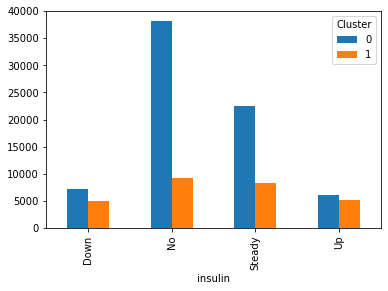

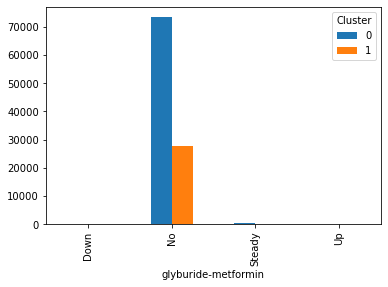

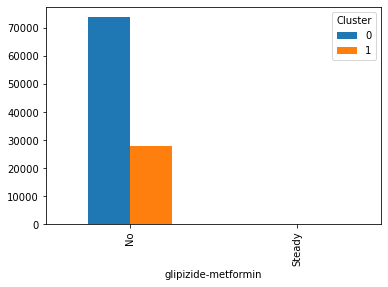

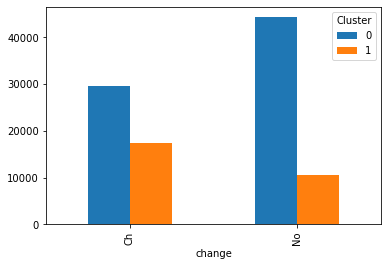

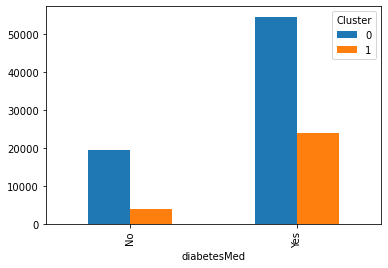

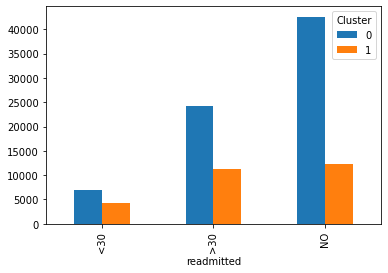

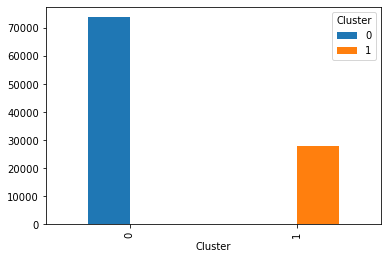

In [59]:
#Draw the total number of patients in each categorical variable
plot_categorical_variable(df2_gm2)

### Gaussian Mixture k=3 version 2

In [60]:
model2k3 = GaussianMixture(n_components=3, max_iter=50, covariance_type='spherical', random_state=1234)
predGmk3 = model2k3.fit_predict(df2_dataScaled)
unique, counts = np.unique(predGmk3, return_counts=True)
print(dict(zip(unique, counts)))
print(model2k3.n_iter_)

{0: 34729, 1: 62183, 2: 4851}
25


In [61]:
df2_gm3 = df2.copy()

df2_gm = df2_gm3.insert(38,"Cluster",predGmk3,True)

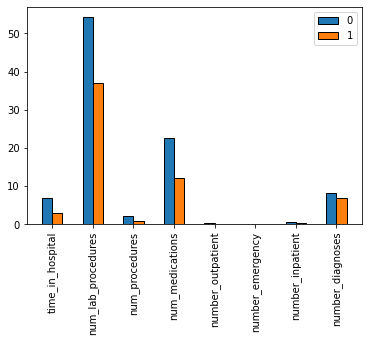

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   6.936    |   2.960    |
+--------------------+------------+------------+
| num_lab_procedures |   54.190   |   36.895   |
+--------------------+------------+------------+
|   num_procedures   |   2.197    |   0.875    |
+--------------------+------------+------------+
|  num_medications   |   22.567   |   12.186   |
+--------------------+------------+------------+
| number_outpatient  |   0.268    |   0.217    |
+--------------------+------------+------------+
|  number_emergency  |   0.135    |   0.101    |
+--------------------+------------+------------+
|  number_inpatient  |   0.639    |   0.407    |
+--------------------+------------+------------+
|  number_diagnoses  |   8.312    |   6.884    |
+--------------------+------------+------------+


In [62]:
#Plot the means of the numerical variables
plot_numeric_means(df2_gm3)

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


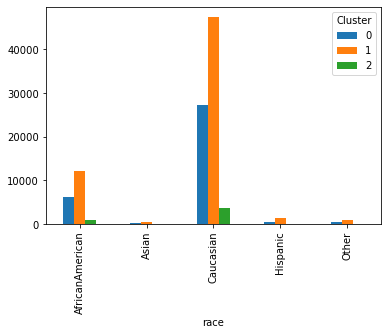

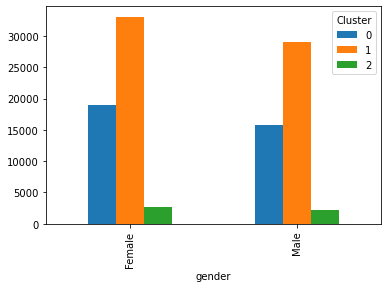

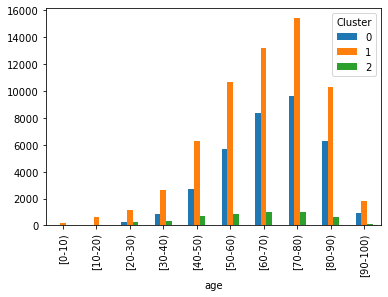

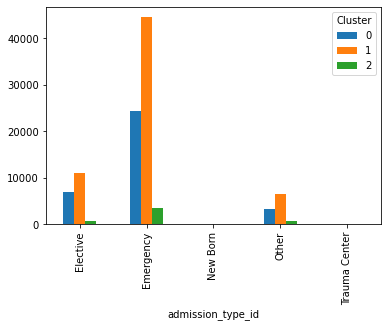

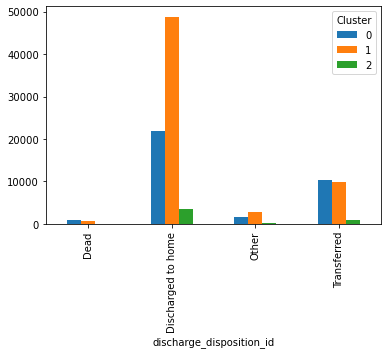

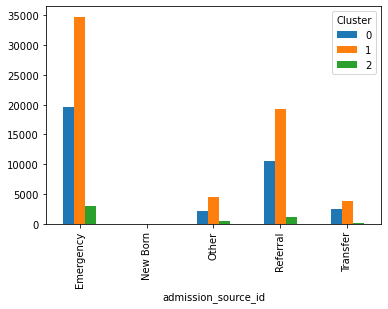

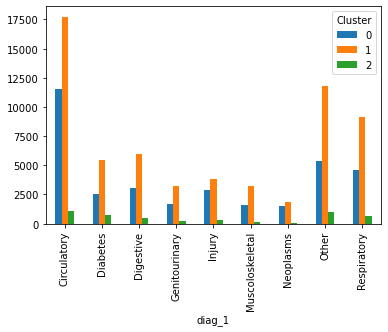

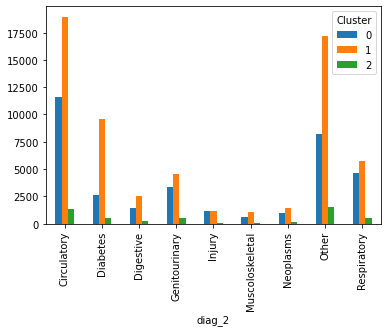

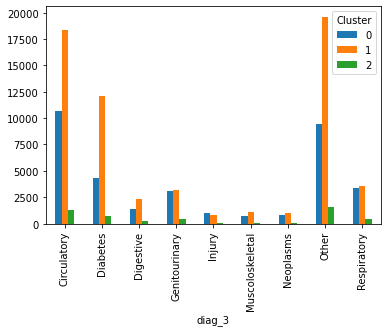

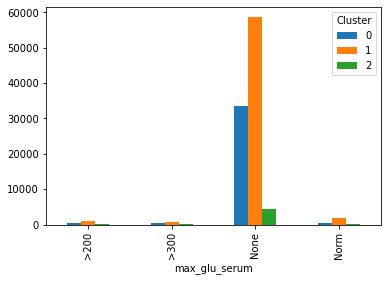

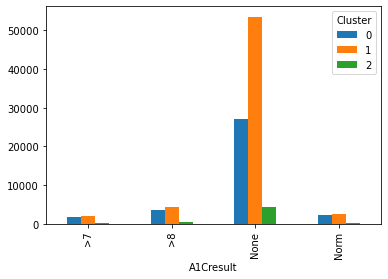

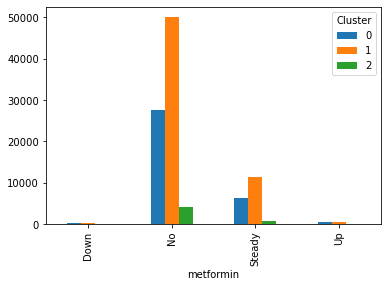

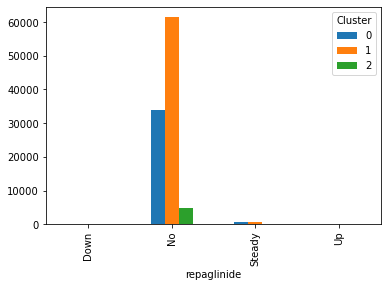

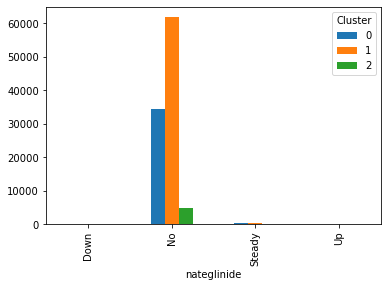

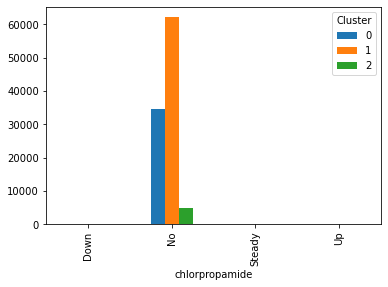

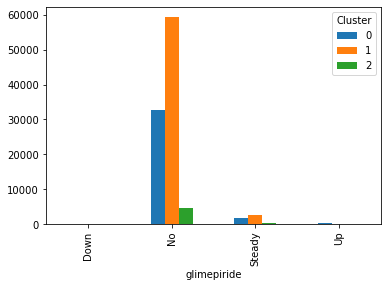

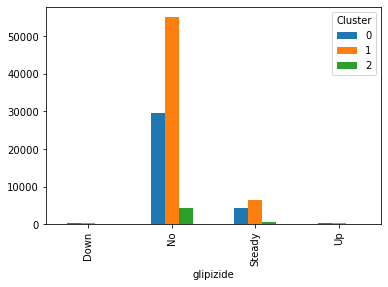

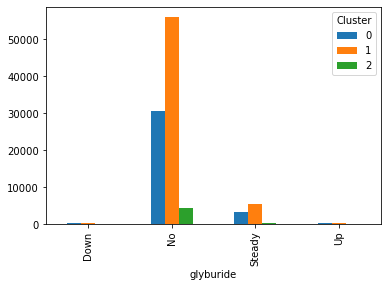

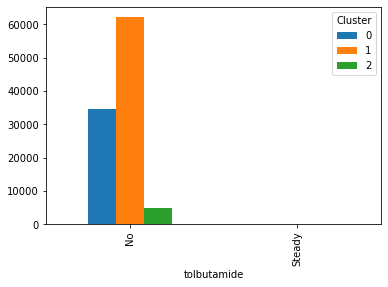

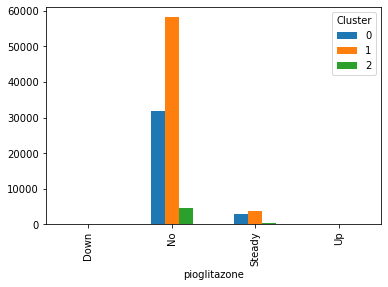

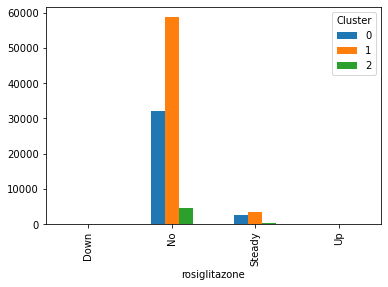

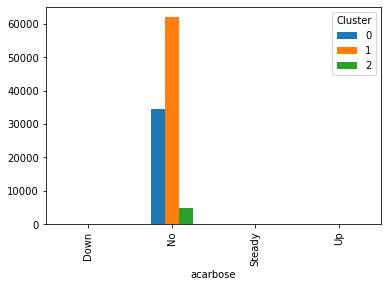

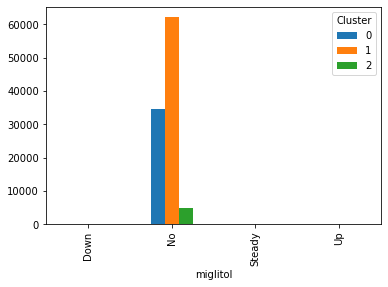

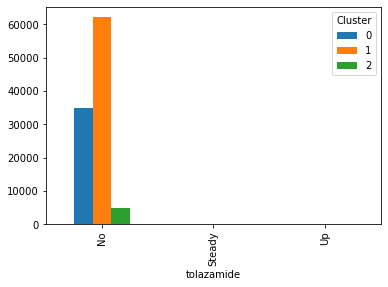

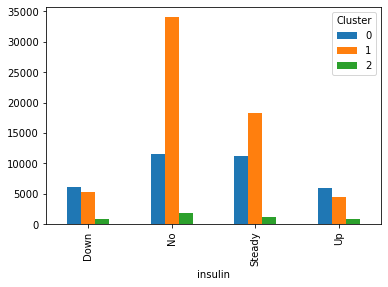

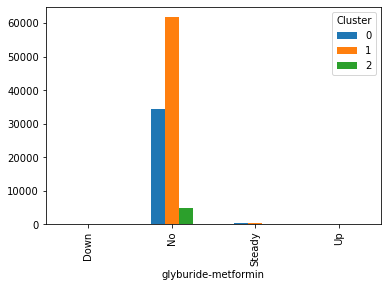

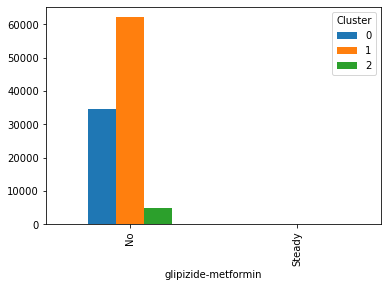

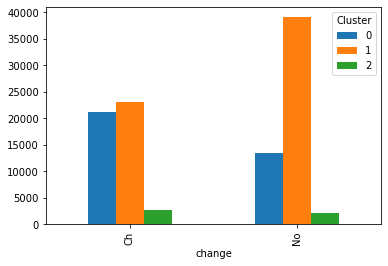

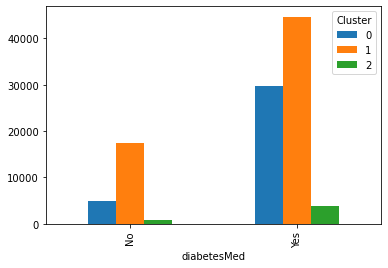

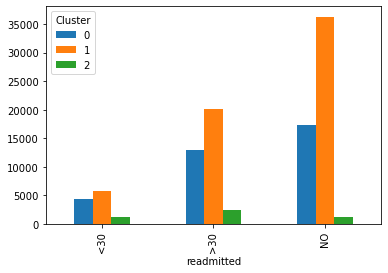

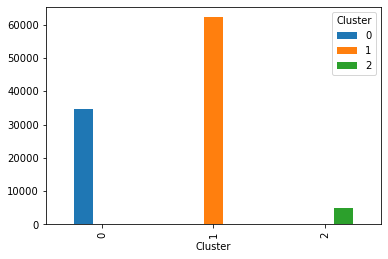

In [63]:
#Plot the total number of patients in each categorical variable
plot_categorical_variable(df2_gm3)

### DBSCAN euclidean version 2

In [85]:
model2Eucl = DBSCAN(eps=10, min_samples=5000, metric="euclidean")
pred2Eucl = model2Eucl.fit_predict(df2_data)
unique, counts = np.unique(pred2Eucl, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 5038, 0: 96725}


In [86]:
df2_eucl = df2.copy()

df2_eucl2 = df2_eucl.insert(38,"Cluster",pred2Eucl,True)

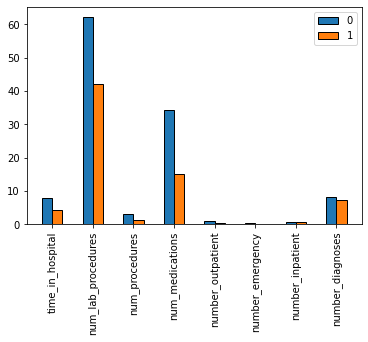

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   8.011    |   4.208    |
+--------------------+------------+------------+
| num_lab_procedures |   62.115   |   42.105   |
+--------------------+------------+------------+
|   num_procedures   |   3.186    |   1.244    |
+--------------------+------------+------------+
|  num_medications   |   34.274   |   15.071   |
+--------------------+------------+------------+
| number_outpatient  |   0.884    |   0.343    |
+--------------------+------------+------------+
|  number_emergency  |   0.492    |   0.183    |
+--------------------+------------+------------+
|  number_inpatient  |   0.820    |   0.626    |
+--------------------+------------+------------+
|  number_diagnoses  |   8.152    |   7.385    |
+--------------------+------------+------------+


In [87]:
#Plot the means of the numerical variables
plot_numeric_means(df2_eucl)

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


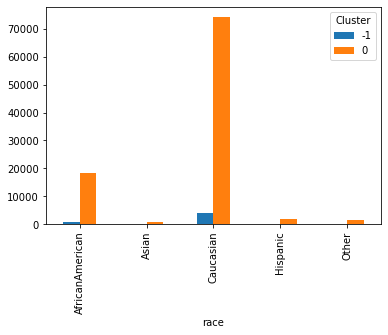

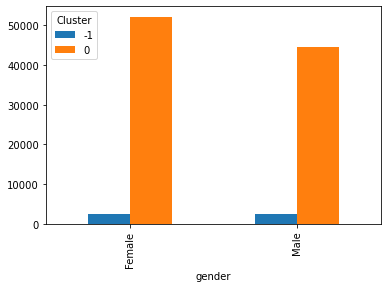

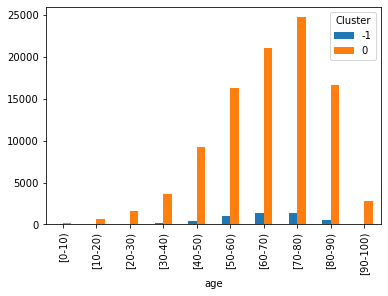

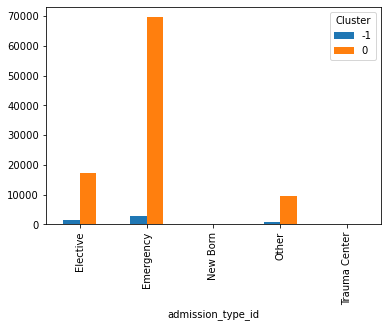

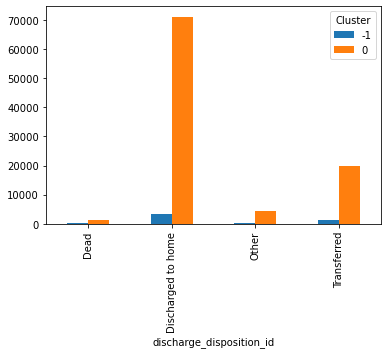

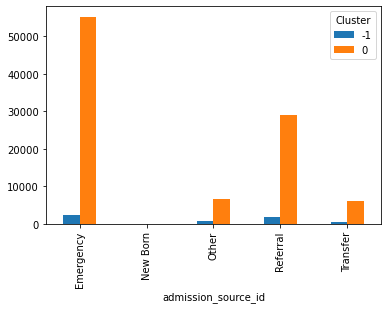

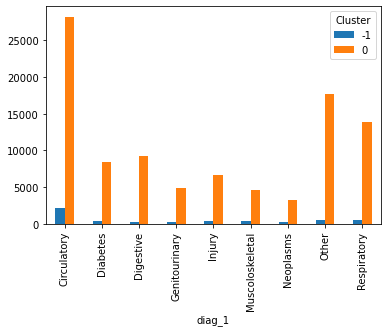

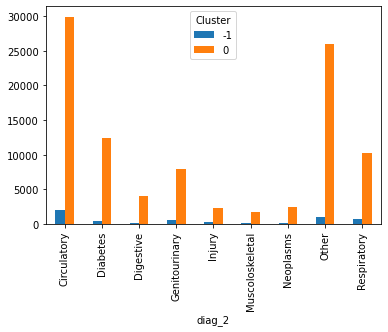

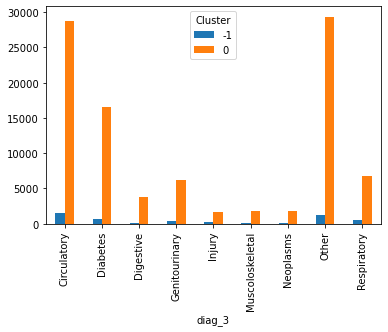

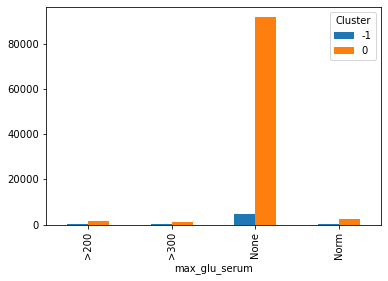

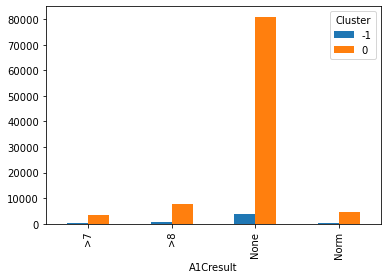

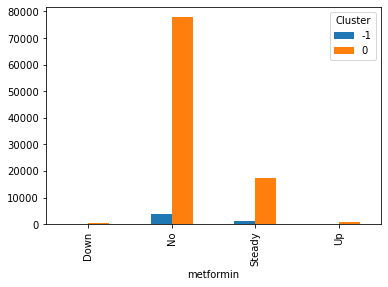

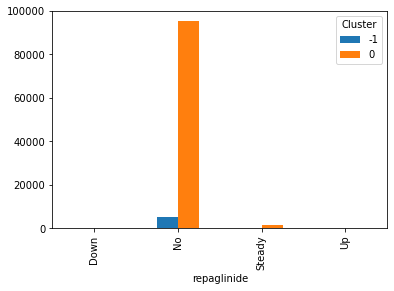

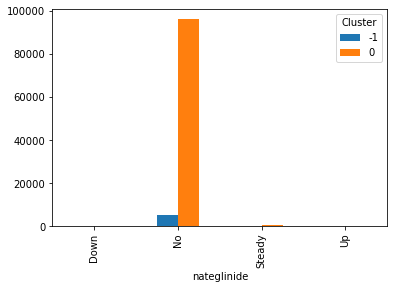

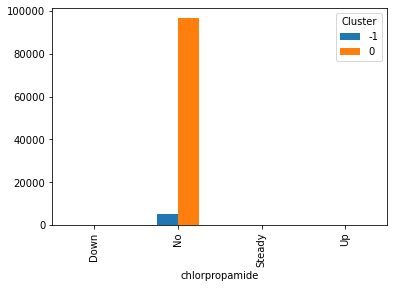

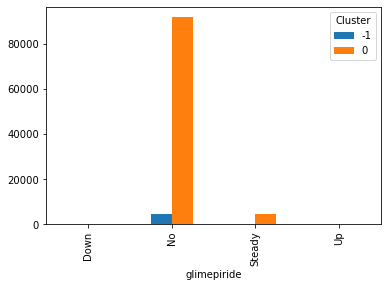

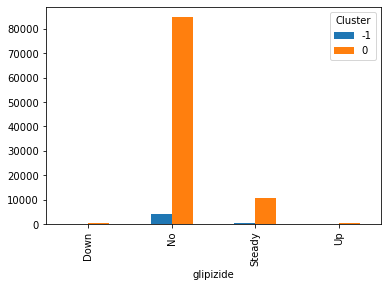

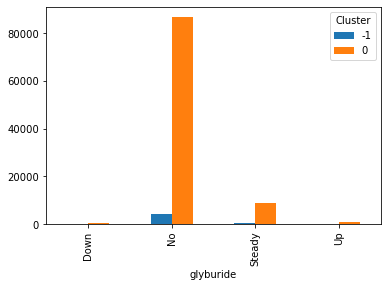

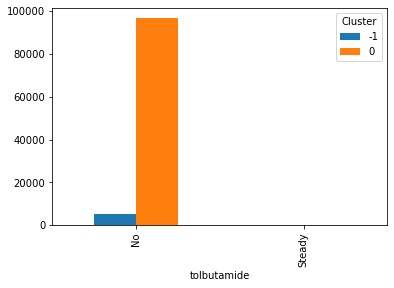

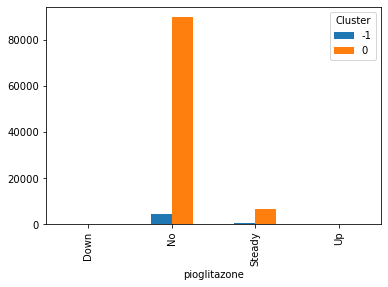

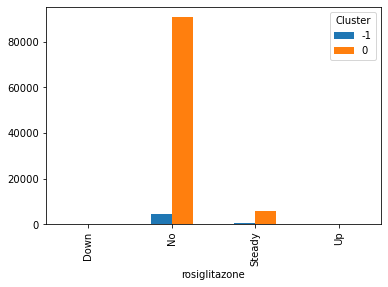

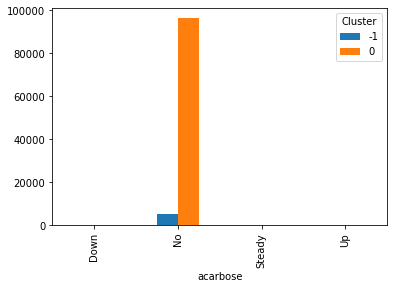

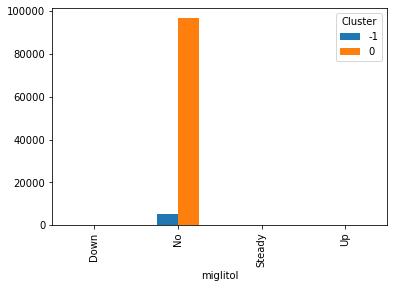

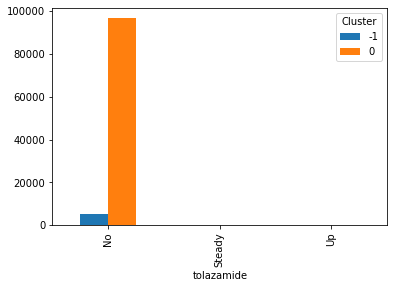

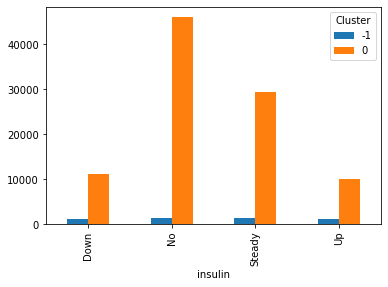

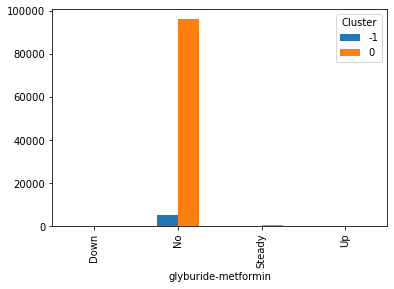

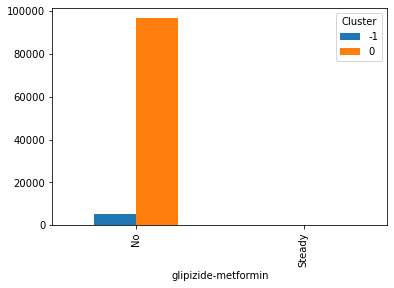

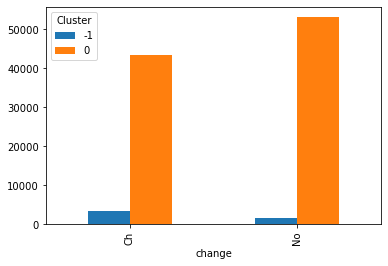

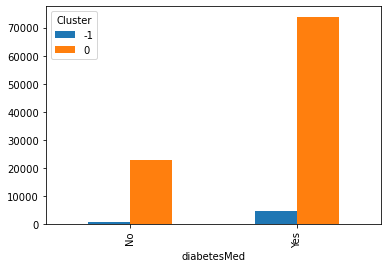

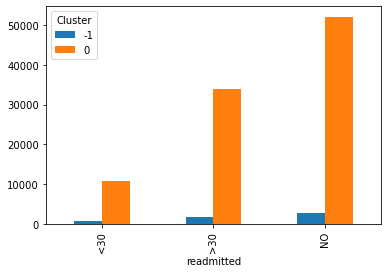

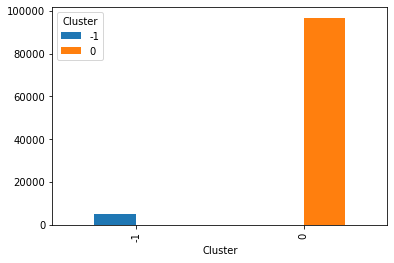

In [88]:
#Plot the total number of patients in each categorical variable
plot_categorical_variable(df2_eucl)

### DBSCAN manhattan version 2

In [89]:
model2Manh = DBSCAN(eps=30, min_samples=10000, metric="manhattan")
pred2Manh = model2Manh.fit_predict(df2_data)
unique, counts = np.unique(pred2Manh, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 18379, 0: 83384}


In [90]:
df2_manh = df2.copy()

df2_manh2 = df2_manh.insert(38,"Cluster",pred2Manh,True)

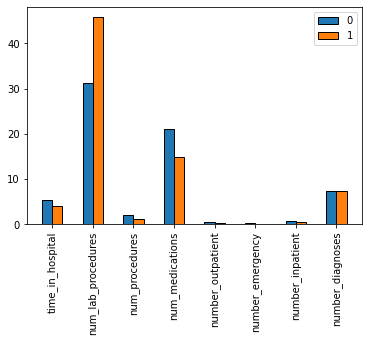

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   5.487    |   4.156    |
+--------------------+------------+------------+
| num_lab_procedures |   31.137   |   45.732   |
+--------------------+------------+------------+
|   num_procedures   |   2.005    |   1.193    |
+--------------------+------------+------------+
|  num_medications   |   21.108   |   14.901   |
+--------------------+------------+------------+
| number_outpatient  |   0.633    |   0.311    |
+--------------------+------------+------------+
|  number_emergency  |   0.329    |   0.169    |
+--------------------+------------+------------+
|  number_inpatient  |   0.721    |   0.617    |
+--------------------+------------+------------+
|  number_diagnoses  |   7.461    |   7.414    |
+--------------------+------------+------------+


In [91]:
#Plot the means of the numerical variables
plot_numeric_means(df2_manh)

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


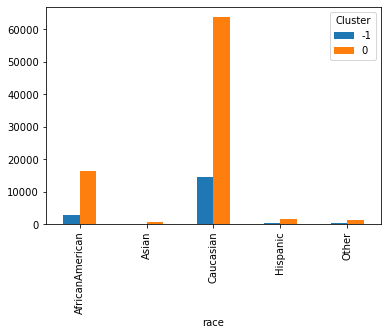

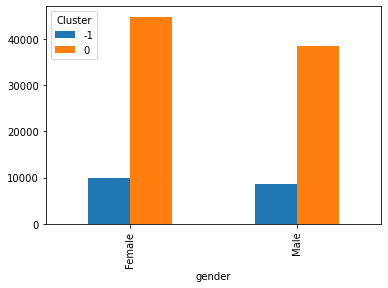

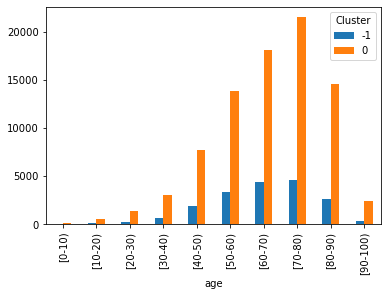

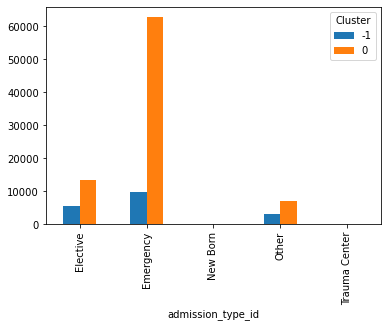

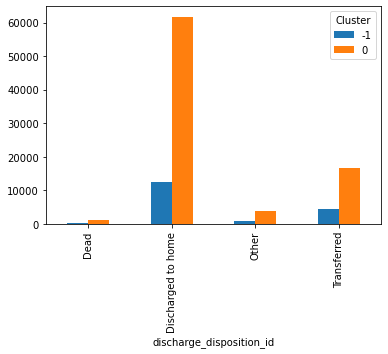

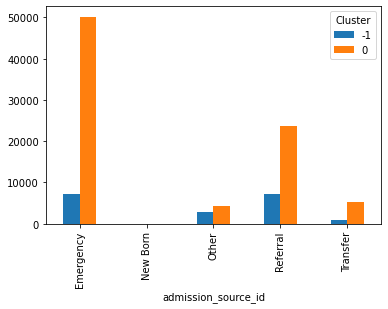

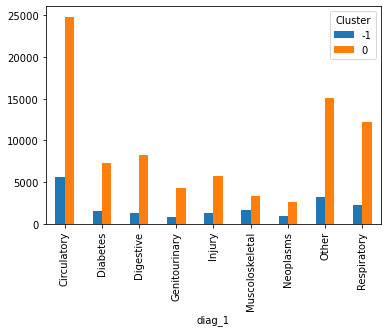

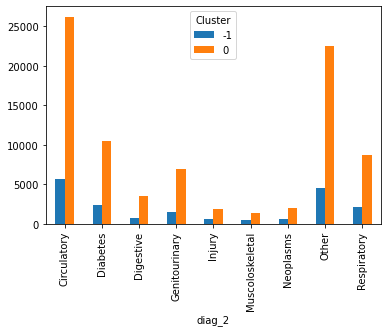

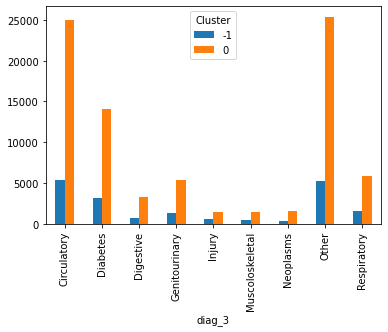

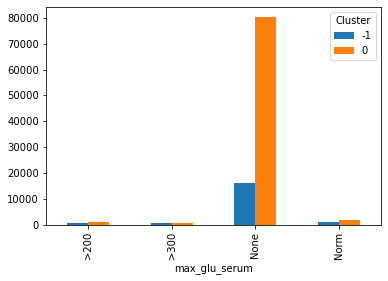

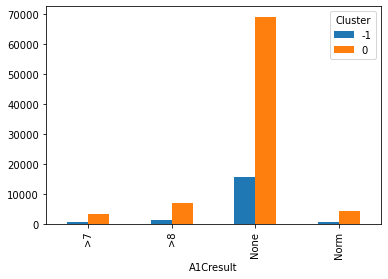

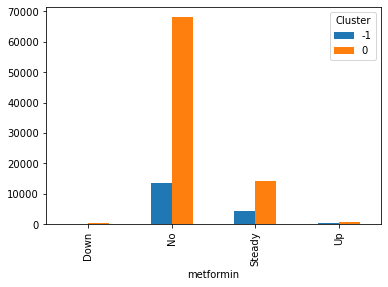

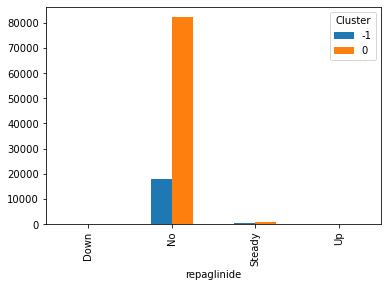

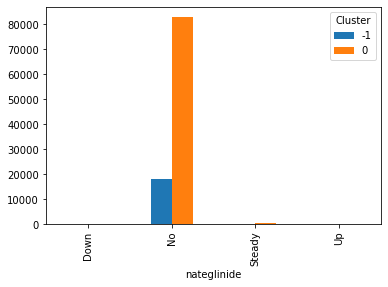

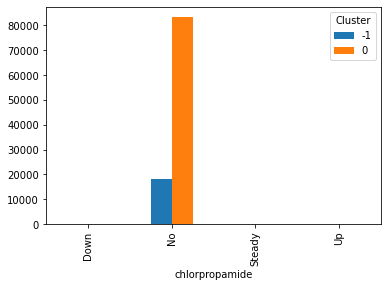

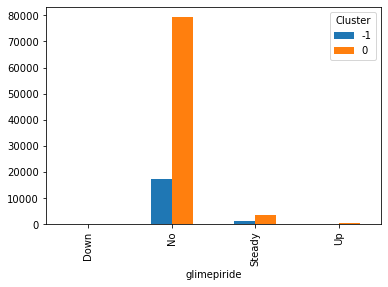

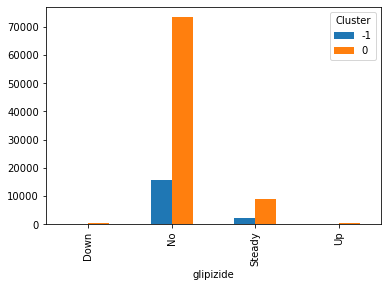

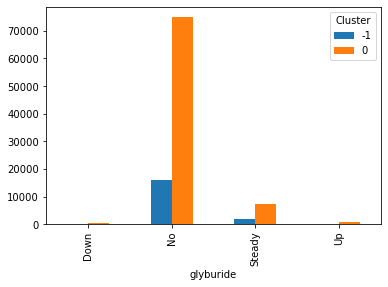

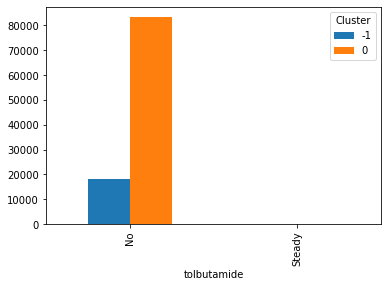

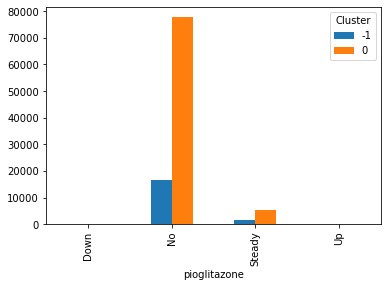

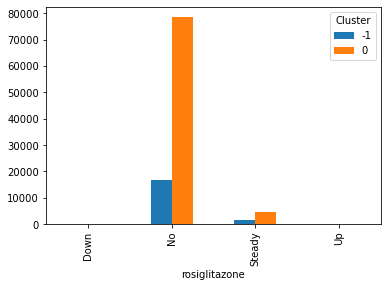

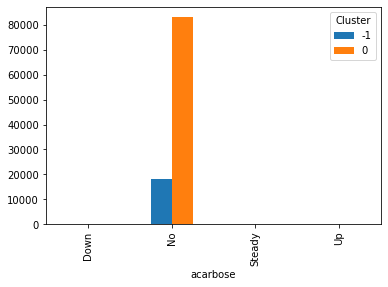

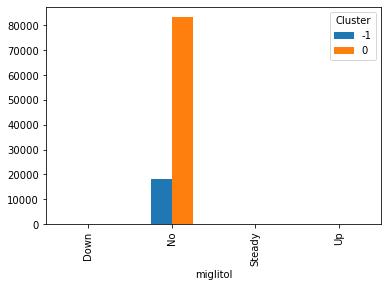

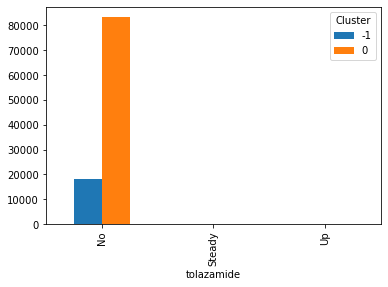

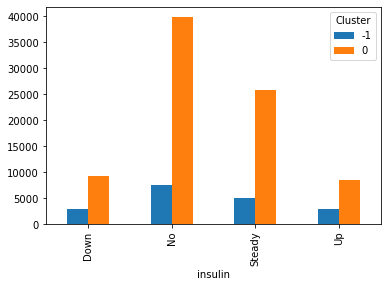

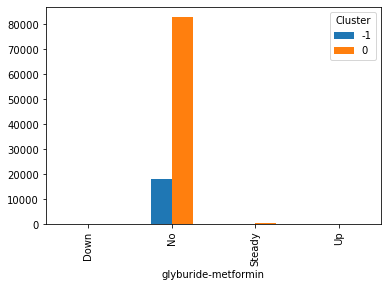

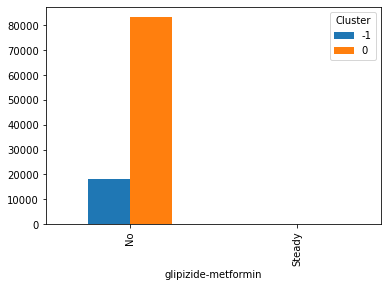

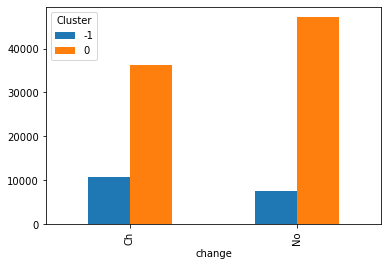

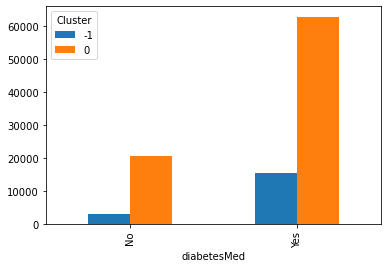

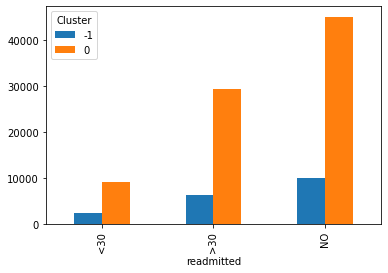

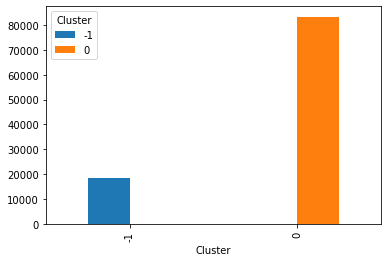

In [92]:
#Plot the total number of patients in each categorical variable
plot_categorical_variable(df2_manh)

### BIRCH K=2 version 2

In [50]:
model2k2 = Birch(n_clusters=2, threshold=2, branching_factor=50)
model2k2.fit(df2_sample)
predBirch = model2k2.predict(df2_dataScaled)
unique, counts = np.unique(predBirch, return_counts=True)
print(dict(zip(unique, counts)))

{0: 86034, 1: 15729}


In [51]:
df2_birch = df2.copy()

df2_birch2 = df2_birch.insert(38,"Cluster",predBirch,True)

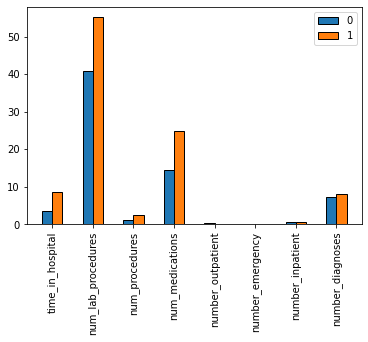

+--------------------+------------+------------+
|      Variable      | Cluster 0  | Cluster 1  |
+====================+============+============+
|  time_in_hospital  |   3.630    |   8.587    |
+--------------------+------------+------------+
| num_lab_procedures |   40.899   |   55.111   |
+--------------------+------------+------------+
|   num_procedures   |   1.119    |   2.547    |
+--------------------+------------+------------+
|  num_medications   |   14.419   |   24.788   |
+--------------------+------------+------------+
| number_outpatient  |   0.408    |   0.156    |
+--------------------+------------+------------+
|  number_emergency  |   0.213    |   0.115    |
+--------------------+------------+------------+
|  number_inpatient  |   0.630    |   0.665    |
+--------------------+------------+------------+
|  number_diagnoses  |   7.283    |   8.184    |
+--------------------+------------+------------+


In [52]:
#Plot the means of the numerical variables
plot_numeric_means(df2_birch)

C:\Users\Edurne\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


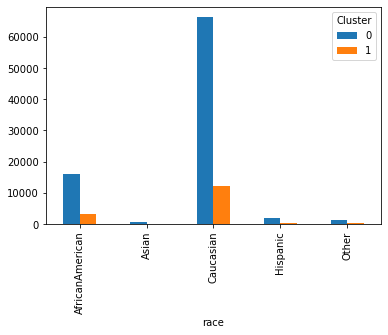

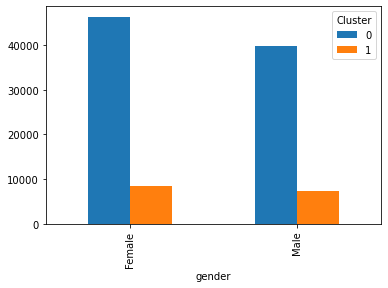

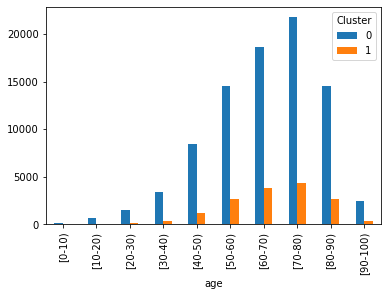

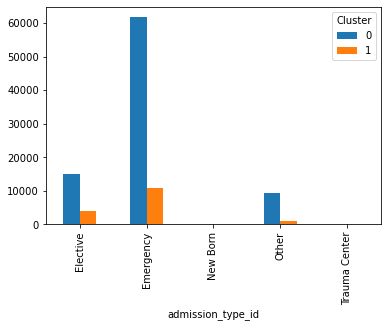

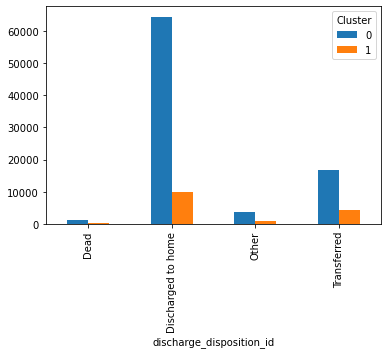

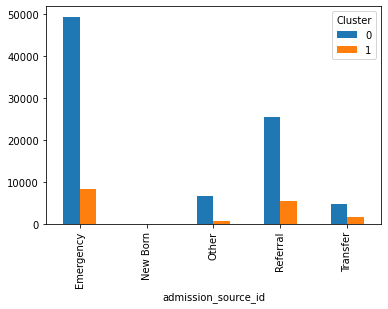

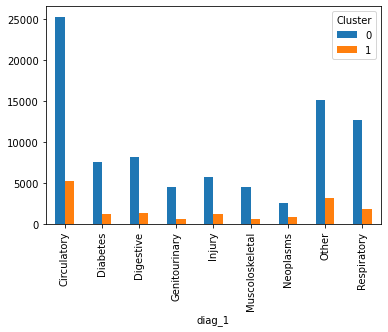

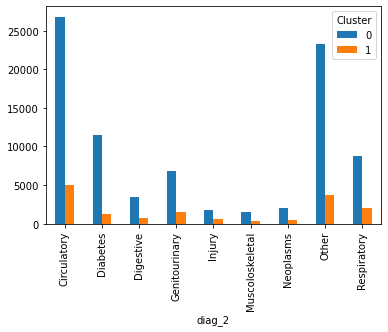

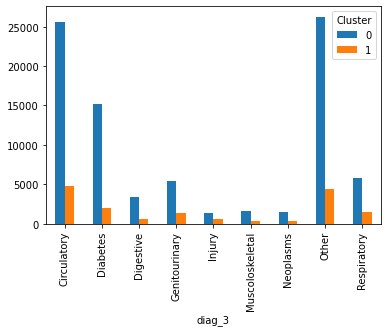

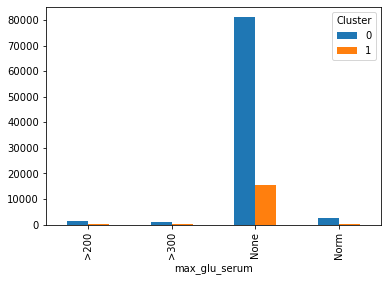

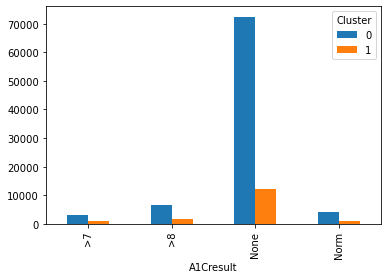

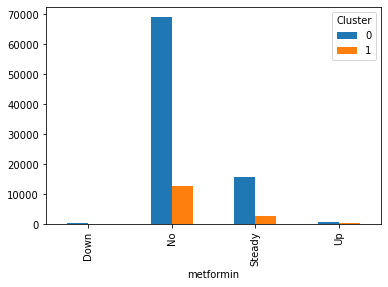

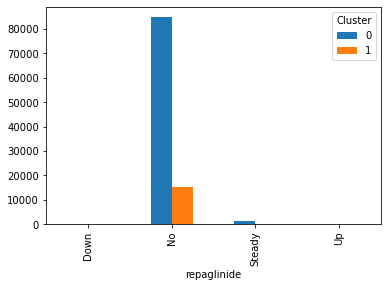

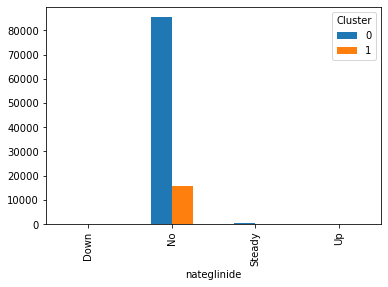

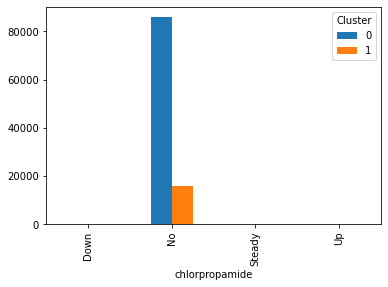

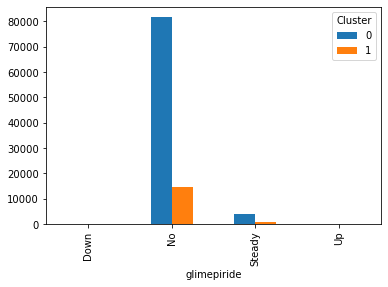

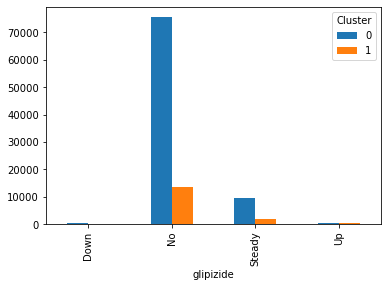

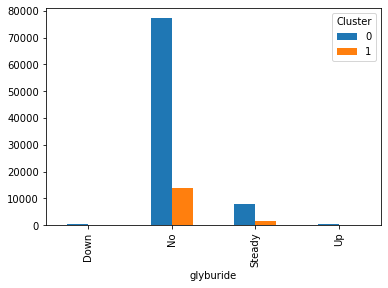

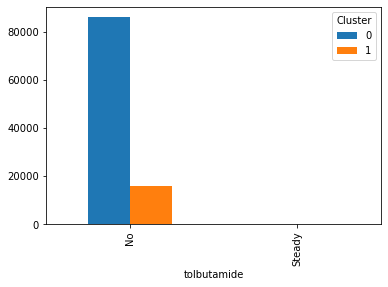

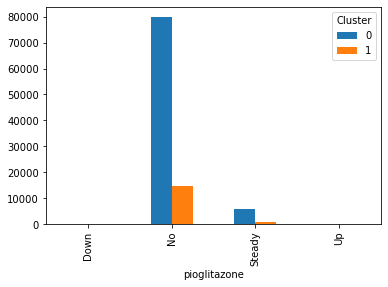

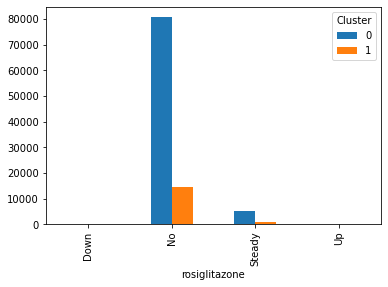

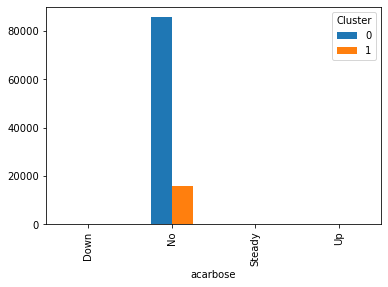

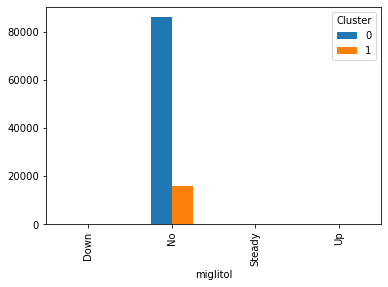

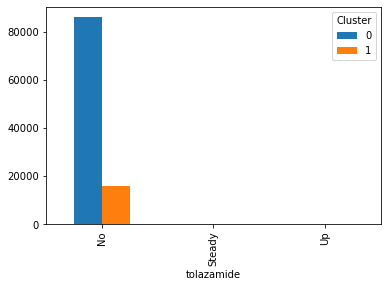

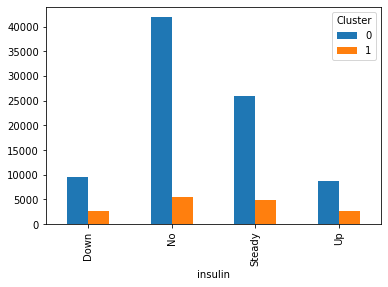

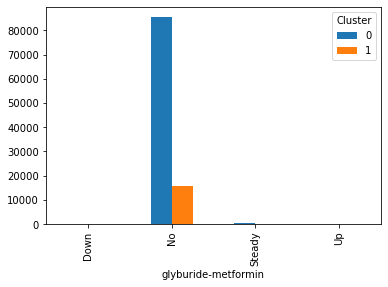

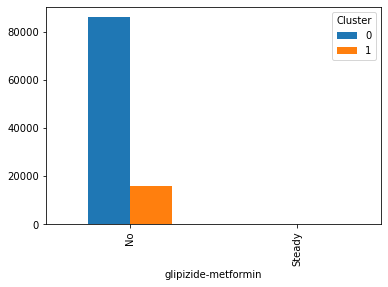

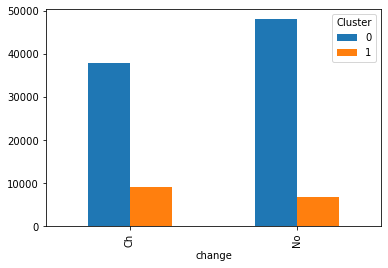

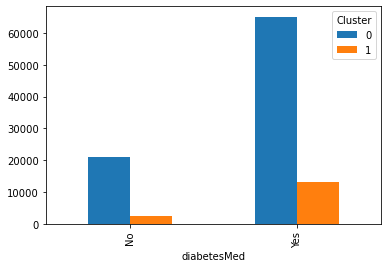

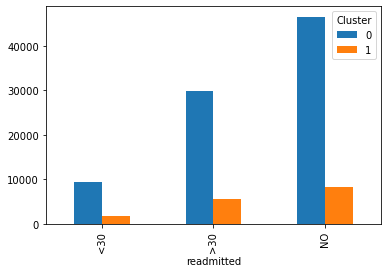

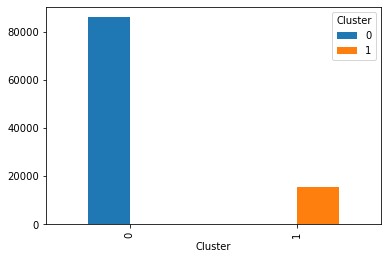

In [53]:
#Plot the total number of patients in each categorical variable
plot_categorical_variable(df2_birch)

### Rand similarity index

In [64]:
#Rand index between k-means k equal to 2 and gaussian mixture with k equal to 2
rand_score(predKmeans,predGmk2)

0.7284136733537417

In [65]:
#Rand index between k-means k equal to 2 and gaussian mixture with k equal to 3
rand_score(predKmeans,predGmk3)

0.8962359746139622

In [66]:
#Rand index between gaussian mixture k equal to 2 and gaussian mixture with k equal to 3
rand_score(predGmk2,predGmk3)

0.7607675416705095